In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from NLP_utils import *

## 사전 작업

In [17]:
pd.read_csv("df_no_author_info_final.csv")

,path,title,author,page_number,context,sentence,cleaned_content
0,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,1,《동패낙송(東稗洛誦)》권 상(上),《동패낙송(東稗洛誦)》권 상(上),동패낙송권 상
1,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,2,광작(廣作),광작(廣作),광작
2,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,3,여주(驪州)에 허(許) 성의 양반이 있었다. 그는 어질고 착하나 몹시 가난했다. 집...,여주(驪州)에 허(許) 성의 양반이 있었다.,여주에 허 성의 양반이 있었다.
3,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,3,여주(驪州)에 허(許) 성의 양반이 있었다. 그는 어질고 착하나 몹시 가난했다. 집...,그는 어질고 착하나 몹시 가난했다.,그는 어질고 착하나 몹시 가난했다.
4,http://www.davincimap.co.kr/davBase/Source/dav...,광작(廣作),NaN,3,여주(驪州)에 허(許) 성의 양반이 있었다. 그는 어질고 착하나 몹시 가난했다. 집...,집에 세 아들을 두고 글 공부를 시키면서 사방 친지에게 두루 구걸하여 독서하는 아들...,집에 세 아들을 두고 글 공부를 시키면서 사방 친지에게 두루 구걸하여 독서하는 아들...
...,...,...,...,...,...,...,...
11660,http://www.davincimap.co.kr/davBase/Source/dav...,홍계월전(洪桂月傳),NaN,691,"이때 천자 위공에 벼슬을 승품하실새, 홍무로 초왕을 봉하시고 여공으로 오왕을 봉하시...","이때 천자 위공에 벼슬을 승품하실새, 홍무로 초왕을 봉하시고 여공으로 오왕을 봉하시...","이때 천자 위공에 벼슬을 승품하실새, 홍무로 초왕을 봉하시고 여공으로 오왕을 봉하시..."
11661,http://www.davincimap.co.kr/davBase/Source/dav...,홍계월전(洪桂月傳),NaN,692,"“오, 초 양국이 정사(政事)폐한지 오래매 급히 행하여 국사를 다스리라.”","“오, 초 양국이 정사(政事)폐한지 오래매 급히 행하여 국사를 다스리라.”","“오, 초 양국이 정사폐한지 오래매 급히 행하여 국사를 다스리라.”"
11662,http://www.davincimap.co.kr/davBase/Source/dav...,홍계월전(洪桂月傳),NaN,693,"하시고 길을 재촉하시니 황은(皇恩)을 축수하고 물러나와 치행을 차려 떠날새, 부사 ...","하시고 길을 재촉하시니 황은(皇恩)을 축수하고 물러나와 치행을 차려 떠날새, 부사 ...","하시고 길을 재촉하시니 황은을 축수하고 물러나와 치행을 차려 떠날새, 부사 불러 서..."
11663,http://www.davincimap.co.kr/davBase/Source/dav...,홍계월전(洪桂月傳),NaN,694,이적에 승상 보국이 나이 사십오세라. 삼남 일녀를 두었으니 영민총혜한지라 장자로 오...,이적에 승상 보국이 나이 사십오세라. 삼남 일녀를 두었으니 영민총혜한지라 장자로 오...,이적에 승상 보국이 나이 사십오세라. 삼남 일녀를 두었으니 영민총혜한지라 장자로 오...


In [35]:
classic_no_author = pd.read_csv("df_no_author_info_final.csv")
classic_with_author = pd.read_csv("df_with_author_info_final.csv")

classic_no_author_prop = txt_to_list("split_sentences/classic_no_author_EC_prop_4.txt")
classic_with_author_prop = txt_to_list("split_sentences/classic_with_author_EC_prop_4.txt")

classic_no_author["EC_prop"] = classic_no_author_prop
classic_with_author["EC_prop"] = classic_with_author_prop

classic_no_author["len"] = classic_no_author["cleaned_content"].apply(lambda x: len(x))
classic_with_author["len"] = classic_with_author["cleaned_content"].apply(lambda x: len(x))


modern_prop = txt_to_list("split_sentences/modern_EC_prop_2.txt")
modern_sen = txt_to_list("split_sentences/modern_literature.txt")

In [36]:
assert len(modern_prop) == len(modern_sen)

In [37]:
modern = pd.DataFrame({"cleaned_content": modern_sen,
              "EC_prop": modern_prop})
modern["len"] = modern["cleaned_content"].apply(lambda x: len(x))
modern

,cleaned_content,EC_prop,len
0,그러나 그들은 별을 보지 않는다.,0.09090909090909091,18
1,거짓말 같은 일이었다.,0.0,12
2,게다가 닭들이 지르밟기까지 하여서 쓰러진 것 부러진 것도 있다.,0.05555555555555555,35
3,“언제 왔수?”,0.0,8
4,그러나 R의 기색은 그리 좋지 못하였나이다.,0.08333333333333333,24
...,...,...,...
148375,여자는 간지러운지 바특 바특 “〈젠료네!……,0.0,24
148376,정(情)과 이(理) 김교신 모압 땅에 유리하던 나오미가 설상가상으로 그 남편 엘리멜...,0.09285714285714286,270
148377,읍에서 술메까지 나가는 동안 학도들은 누누이 선생님들을 졸랐었다.,0.0,36
148378,"새침한 얼굴이 파르족족하고 기다란 눈썹과 검푸른 두 눈 가장자리에 예쁜 입, 뾰로통...",0.05970149253731343,132


In [38]:
classic_no_author.to_csv("df_no_author_info_final_7cols.csv", index=False)
classic_with_author.to_csv("df_with_author_info_final_7cols.csv", index=False)
modern.to_csv("modern_3cols.csv", index=False)

## 데이터프레임 불러오기

In [5]:
import pandas as pd

In [6]:
classic_no_author = pd.read_csv("df_no_author_info_final_7cols.csv")
classic_with_author = pd.read_csv("df_with_author_info_final_7cols.csv")
modern = pd.read_csv("modern_3cols.csv")

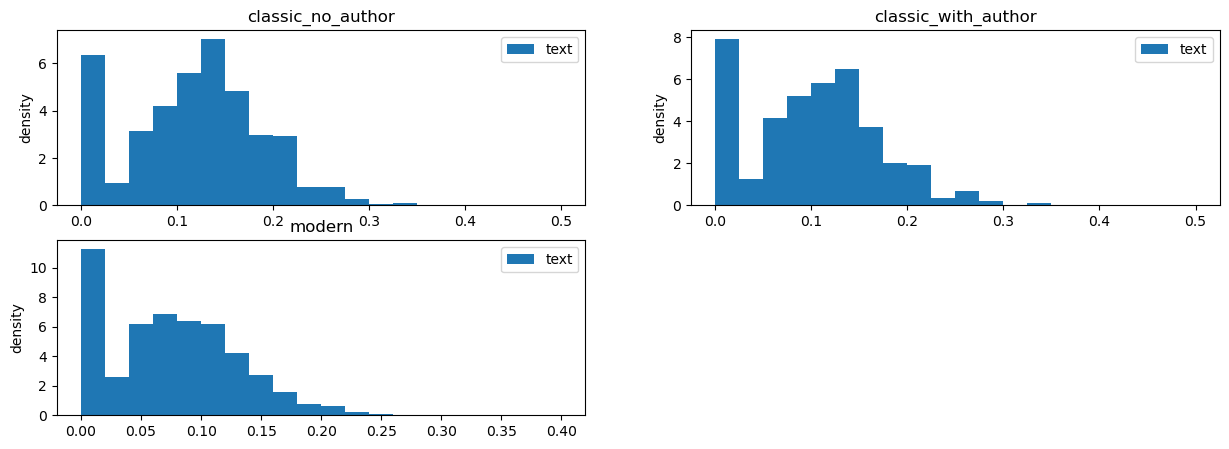

In [40]:
fig, axes = plt.subplots(2, 2, figsize = (15, 5))

classic_no_author["EC_prop"].plot(kind='hist', bins=20, title='classic_no_author', ax=axes[0, 0], density= True)
axes[0, 0].legend(["text"], loc='upper right')
axes[0, 0].set_ylabel("density")

classic_with_author["EC_prop"].plot(kind='hist', bins=20, title='classic_with_author', ax=axes[0, 1], density= True)
axes[0, 1].legend(["text"], loc='upper right')
axes[0, 1].set_ylabel("density")

modern["EC_prop"].plot(kind='hist', bins=20, title='modern', ax=axes[1,0], density= True)
axes[1,0].legend(["text"], loc='upper right')
axes[1,0].set_ylabel("density")

axes[1, 1].axis('off')

plt.show()

C:\Users\Junho\AppData\Local\Temp\ipykernel_23300\2605900479.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(classic_no_author["EC_prop"], ax=ax, fill=True, label='classic_no_author', palette="OrRd", alpha=0.3)
c:\Users\Junho\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Junho\AppData\Local\Temp\ipykernel_23300\2605900479.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(classic_with_author["EC_prop"], ax=ax, fill=True, label='classic_no_author', palette="Greens", alpha=0.3)
c:\Users\Junho\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

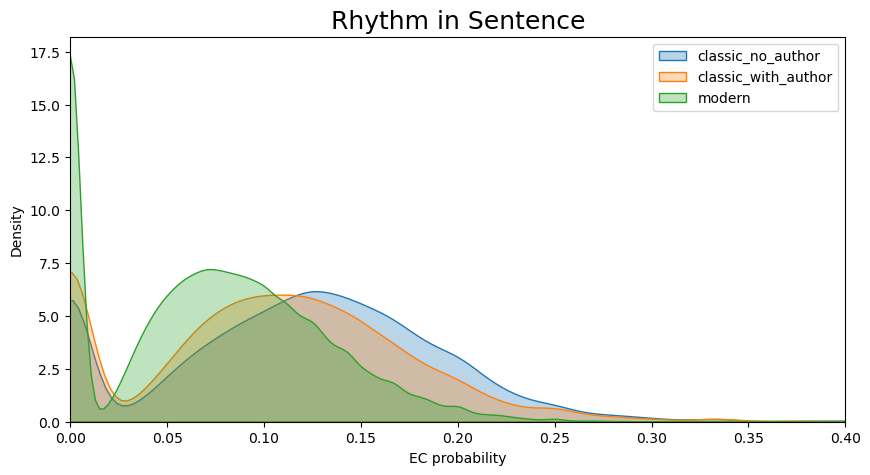

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

# classic_no_author.plot(kind='kde', title='Density Plot for classic_no_author', ax=ax)
sns.kdeplot(classic_no_author["EC_prop"], ax=ax, fill=True, label='classic_no_author', palette="OrRd", alpha=0.3)
# classic_with_author.plot(kind='kde', title='Density Plot for classic_with_author', ax=ax)
sns.kdeplot(classic_with_author["EC_prop"], ax=ax, fill=True, label='classic_no_author', palette="Greens", alpha=0.3)
sns.kdeplot(modern["EC_prop"], ax=ax, fill=True, label='modern', palette="PuBu", alpha=0.3)

ax.legend(["classic_no_author", "classic_with_author", "modern"], loc='upper right')
ax.set_ylabel("Density")
ax.set_xlabel("EC probability")

ax.set_xlim(0.0, 0.4)

plt.title("Rhythm in Sentence", fontsize=18)
plt.show()


In [43]:
max(classic_with_author["len"])

1101

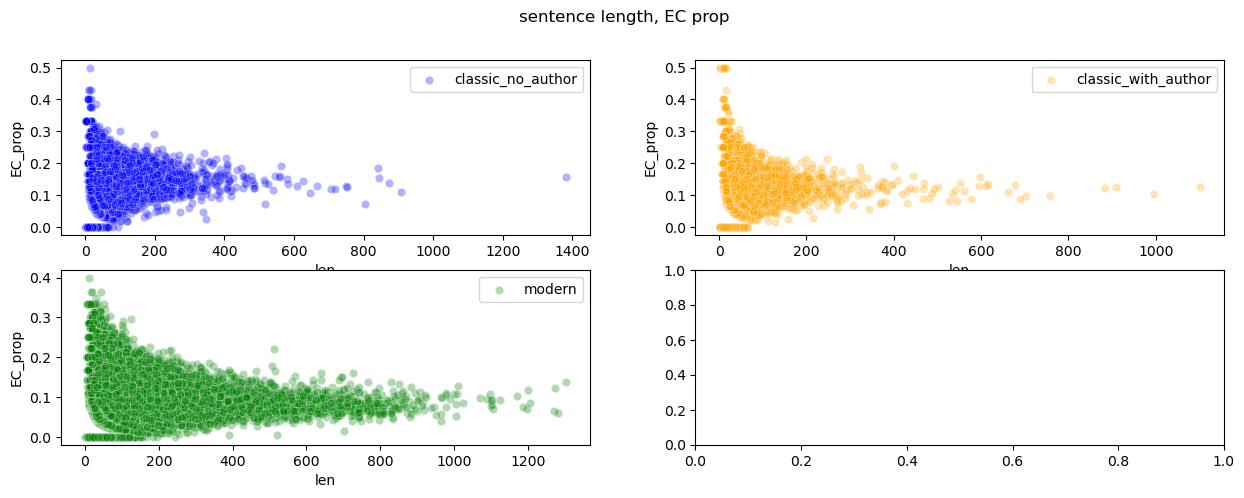

In [10]:
# (문장 길이, 연결어미 비율) 산점도
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize = (15, 5))

sns.scatterplot(data=classic_no_author, x="len", y="EC_prop", ax=axes[0,0], color="blue", alpha=0.3)
sns.scatterplot(data=classic_with_author, x="len", y="EC_prop", ax=axes[0,1], color="orange", alpha=0.3)
sns.scatterplot(data=modern, x="len", y="EC_prop", ax=axes[1,0], color="green", alpha=0.3)

axes[0, 0].legend(["classic_no_author"], loc='upper right')
axes[0, 1].legend(["classic_with_author"], loc='upper right')
axes[1, 0].legend(["modern"], loc='upper right')

plt.suptitle("sentence length, EC prop")

plt.show()

In [ ]:
# (문장 길이, 연결어미 비율) 산점도
fig, ax = plt.subplots(figsize=(10, 5))

sns.scatterplot(data=classic_no_author, x="len", y="EC_prop", ax=ax, color="blue", alpha=0.3)
sns.scatterplot(data=classic_with_author, x="len", y="EC_prop", ax=ax, color="orange", alpha=0.3)
sns.scatterplot(data=modern, x="len", y="EC_prop", ax=ax, color="green", alpha=0.3)

ax.legend(["classic_no_author", "classic_with_author", "modern"], loc='upper right')
ax.set_ylabel("EC_prop")
ax.set_xlabel("sentence length")

plt.title("sentence length, EC prop")

plt.show()

# 이상치 탐지?

In [3]:
import pandas as pd

# classic_no_author = pd.read_csv("df_no_author_info_final_7cols.csv")
# classic_with_author = pd.read_csv("df_with_author_info_final_7cols.csv")
modern = pd.read_csv("modern_3cols.csv")

* 추가

In [4]:
classic_no_author = pd.read_csv("df_no_author_OD(추가).csv")
classic_no_author

,path,title,author,page_number,context,sentence,cleaned_content,EC_prop,len
0,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,735,구운몽 하,구운몽 하,구운몽 하,0.000000,5
1,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,736,"천자가 환자(宦者)를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가...","천자가 환자(宦者)를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가...","천자가 환자를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가 오지 ...",0.172414,50
2,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,736,"천자가 환자(宦者)를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가...",환자가 급히 찾으니 상서가 바야흐로 정십삼을 데리고 장안 술집에 가 술에 흠뻑 취하였다.,환자가 급히 찾으니 상서가 바야흐로 정십삼을 데리고 장안 술집에 가 술에 흠뻑 취하였다.,0.125000,49
3,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,736,"천자가 환자(宦者)를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가...",환자가 급히 명패(名牌)로 부르니 상서가 취중에 정신을 차리지 못하여 창기(娼妓)에...,환자가 급히 명패로 부르니 상서가 취중에 정신을 차리지 못하여 창기에게 붙들려 조복...,0.164706,169
4,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,737,「내 이태백을 보지 못하여 한이었는데 경을 얻었으니 어찌 이태백을 부러워하겠는가? ...,「내 이태백을 보지 못하여 한이었는데 경을 얻었으니 어찌 이태백을 부러워하겠는가? ...,내 이태백을 보지 못하여 한이었는데 경을 얻었으니 어찌 이태백을 부러워하겠는가? 짐...,0.147541,112
...,...,...,...,...,...,...,...,...,...
6398,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,925,"「선왕이 매양 석참정 산소에 자주 친행(親行)하심을 과인이 잊지 아니하였으나, 그 ...","「선왕이 매양 석참정 산소에 자주 친행(親行)하심을 과인이 잊지 아니하였으나, 그 ...","선왕이 매양 석참정 산소에 자주 친행하심을 과인이 잊지 아니하였으나, 그 사이 삼년...",0.106061,128
6399,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,926,하고 즉시 발생하여 석참정 산소의 가 정성으로 제하고 돌아와 정사를 다스리니 위국이...,하고 즉시 발생하여 석참정 산소의 가 정성으로 제하고 돌아와 정사를 다스리니 위국이...,하고 즉시 발생하여 석참정 산소의 가 정성으로 제하고 돌아와 정사를 다스리니 위국이...,0.214286,62
6400,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,927,"세월이 여류하여 위왕의 나이 사십이 되매 삼자 일녀를 두고, 여러 형제 다 각각 자...","세월이 여류하여 위왕의 나이 사십이 되매 삼자 일녀를 두고, 여러 형제 다 각각 자...","세월이 여류하여 위왕의 나이 사십이 되매 삼자 일녀를 두고, 여러 형제 다 각각 자...",0.125000,83
6401,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,927,"세월이 여류하여 위왕의 나이 사십이 되매 삼자 일녀를 두고, 여러 형제 다 각각 자...",대대로 충신(忠臣) 열사(烈士)가 계계승승(繼繼承承)하더라.,대대로 충신 열사가 계계승승하더라.,0.000000,19


In [5]:
modern

,cleaned_content,EC_prop,len
0,그러나 그들은 별을 보지 않는다.,0.090909,18
1,거짓말 같은 일이었다.,0.000000,12
2,게다가 닭들이 지르밟기까지 하여서 쓰러진 것 부러진 것도 있다.,0.055556,35
3,“언제 왔수?”,0.000000,8
4,그러나 R의 기색은 그리 좋지 못하였나이다.,0.083333,24
...,...,...,...
148375,여자는 간지러운지 바특 바특 “〈젠료네!……,0.000000,24
148376,정(情)과 이(理) 김교신 모압 땅에 유리하던 나오미가 설상가상으로 그 남편 엘리멜...,0.092857,270
148377,읍에서 술메까지 나가는 동안 학도들은 누누이 선생님들을 졸랐었다.,0.000000,36
148378,"새침한 얼굴이 파르족족하고 기다란 눈썹과 검푸른 두 눈 가장자리에 예쁜 입, 뾰로통...",0.059701,132


In [6]:
# X, y 좌표화
# X = len, y = EC_prop
X = [(x, y) for x, y in zip(modern["len"], modern["EC_prop"])]
X_no_zero = [(x, y) for x, y in X if y != 0]
X_no_zero

[(18, 0.0909090909090909),
 (35, 0.0555555555555555),
 (24, 0.0833333333333333),
 (64, 0.0833333333333333),
 (65, 0.0606060606060606),
 (13, 0.1),
 (18, 0.2),
 (215, 0.1504424778761062),
 (78, 0.0681818181818181),
 (35, 0.1176470588235294),
 (28, 0.0666666666666666),
 (34, 0.1333333333333333),
 (134, 0.0869565217391304),
 (31, 0.1111111111111111),
 (121, 0.136986301369863),
 (32, 0.1111111111111111),
 (33, 0.0588235294117647),
 (41, 0.1304347826086956),
 (66, 0.027027027027027),
 (88, 0.08),
 (340, 0.0718232044198895),
 (96, 0.1111111111111111),
 (71, 0.0588235294117647),
 (65, 0.0555555555555555),
 (62, 0.1142857142857142),
 (48, 0.04),
 (54, 0.1428571428571428),
 (60, 0.1176470588235294),
 (78, 0.0851063829787234),
 (74, 0.1666666666666666),
 (30, 0.1),
 (75, 0.0975609756097561),
 (17, 0.125),
 (92, 0.02),
 (107, 0.0185185185185185),
 (36, 0.0526315789473684),
 (68, 0.064516129032258),
 (40, 0.1428571428571428),
 (24, 0.0714285714285714),
 (50, 0.1034482758620689),
 (51, 0.0882352941

In [7]:
print(len(X))
print(len(X_no_zero))

148380
115191


## linear로 탐지하기 (50%)

In [8]:
from sklearn.svm import OneClassSVM

clf = OneClassSVM(kernel="linear", verbose=True)
clf.fit(X)

[LibSVM]

In [7]:
y = clf.predict(X)

In [13]:
X1 = [(x, y) for x, y in zip(classic_no_author["len"], classic_no_author["EC_prop"])]
X2 = [(x, y) for x, y in zip(classic_with_author["len"], classic_with_author["EC_prop"])]

In [14]:
y1 = clf.predict(X1)
y2 = clf.predict(X2)

In [8]:
modern["outlier"] = y

In [15]:
classic_no_author["outlier"] = y1
classic_with_author["outlier"] = y2

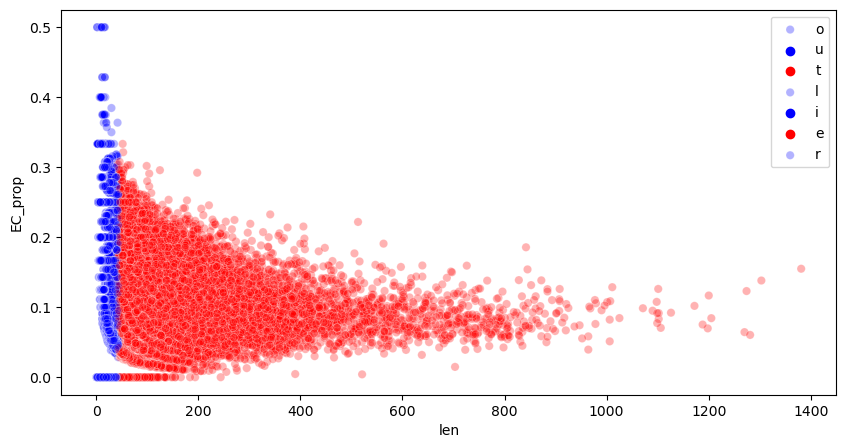

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

custom_palette = {-1: "blue", 1: "red"}
sns.scatterplot(data=modern, x="len", y="EC_prop", ax=ax, hue="outlier", palette=custom_palette, alpha=0.3)
sns.scatterplot(data=classic_no_author, x="len", y="EC_prop", ax=ax, hue="outlier", palette=custom_palette, alpha=0.3)
sns.scatterplot(data=classic_with_author, x="len", y="EC_prop", ax=ax, hue="outlier", palette=custom_palette, alpha=0.3)

ax.legend("outlier")

* 0을 모두 이상치로 처리하는 것을 확인
* 영과잉 분포의 문제

## EC prop 0 제거

In [14]:
# X, y 좌표화
# X = len, y = EC_prop
X = [[x, y] for x, y in zip(modern["len"], modern["EC_prop"])]
X_no_zero = [[x, y] for x, y in X if y != 0]
X_no_zero

[[18, 0.0909090909090909],
 [35, 0.0555555555555555],
 [24, 0.0833333333333333],
 [64, 0.0833333333333333],
 [65, 0.0606060606060606],
 [13, 0.1],
 [18, 0.2],
 [215, 0.1504424778761062],
 [78, 0.0681818181818181],
 [35, 0.1176470588235294],
 [28, 0.0666666666666666],
 [34, 0.1333333333333333],
 [134, 0.0869565217391304],
 [31, 0.1111111111111111],
 [121, 0.136986301369863],
 [32, 0.1111111111111111],
 [33, 0.0588235294117647],
 [41, 0.1304347826086956],
 [66, 0.027027027027027],
 [88, 0.08],
 [340, 0.0718232044198895],
 [96, 0.1111111111111111],
 [71, 0.0588235294117647],
 [65, 0.0555555555555555],
 [62, 0.1142857142857142],
 [48, 0.04],
 [54, 0.1428571428571428],
 [60, 0.1176470588235294],
 [78, 0.0851063829787234],
 [74, 0.1666666666666666],
 [30, 0.1],
 [75, 0.0975609756097561],
 [17, 0.125],
 [92, 0.02],
 [107, 0.0185185185185185],
 [36, 0.0526315789473684],
 [68, 0.064516129032258],
 [40, 0.1428571428571428],
 [24, 0.0714285714285714],
 [50, 0.1034482758620689],
 [51, 0.0882352941

In [15]:
X_no_zero = np.array(X_no_zero)
X_no_zero.shape

(115191, 2)

In [16]:
# length -> (0, 1) 스케일링
min_val = np.min(X_no_zero[:, 0])
max_val = np.max(X_no_zero[:, 0])

scaled_vector = (X_no_zero[:, 0] - min_val) / (max_val - min_val)
scaled_vector

array([0.01077752, 0.02386451, 0.01539646, ..., 0.2047729 , 0.09853734,
       0.04080062])

* 동일한 값으로 스케일링 해야함

In [17]:
X_no_zero[:, 0] = scaled_vector
X_no_zero

array([[0.01077752, 0.09090909],
       [0.02386451, 0.05555556],
       [0.01539646, 0.08333333],
       ...,
       [0.2047729 , 0.09285714],
       [0.09853734, 0.05970149],
       [0.04080062, 0.12903226]])

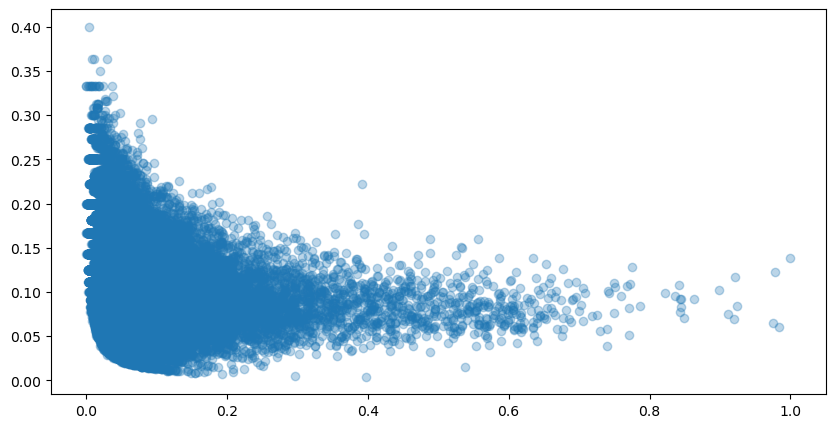

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

custom_palette = {-1: "blue", 1: "red"}
ax.scatter(x=X_no_zero[:, 0], y=X_no_zero[:, 1], alpha=0.3)

In [19]:
from sklearn.svm import OneClassSVM

clf2 = OneClassSVM(verbose=True, nu=0.001)
clf2.fit(X_no_zero)

[LibSVM]

OneClassSVM(nu=0.001, verbose=True)

In [20]:
y_no_zero = clf2.predict(X_no_zero)
y_no_zero

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [21]:
y_no_zero_new = y_no_zero[:, np.newaxis]
y_no_zero_new.shape

(115191, 1)

In [22]:
X_no_zero_res = np.concatenate([X_no_zero, y_no_zero_new], axis=1)
X_no_zero_res.shape

(115191, 3)

In [23]:
sum(X_no_zero_res[:, 2] == 1)

115022

In [24]:
X_prop_df = pd.DataFrame({"len": X_no_zero_res[:, 0],
                          "EC_prop": X_no_zero_res[:, 1],
                          "outlier": X_no_zero_res[:, 2]})
X_prop_df

,len,EC_prop,outlier
0,0.010778,0.090909,1.0
1,0.023865,0.055556,1.0
2,0.015396,0.083333,1.0
3,0.046189,0.083333,1.0
4,0.046959,0.060606,1.0
...,...,...,...
115186,0.036182,0.222222,1.0
115187,0.093918,0.092308,1.0
115188,0.204773,0.092857,1.0
115189,0.098537,0.059701,1.0


Text(0.5, 1.0, 'Outlier Detection')

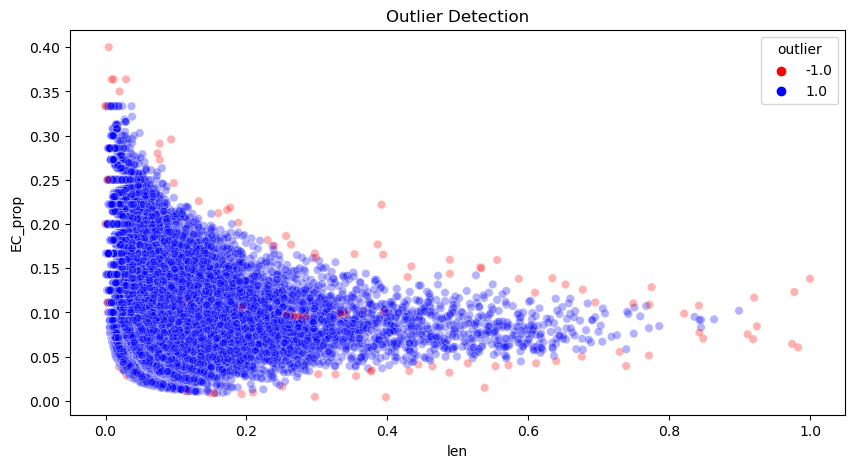

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

custom_palette = {-1: "red", 1: "blue"}
sns.scatterplot(data=X_prop_df, x="len", y="EC_prop", ax=ax, hue="outlier", palette=custom_palette, alpha=0.3)

plt.title("Outlier Detection")

* 성공!

# 이상치 판단하기

In [26]:
classic_no_author_no_zero = classic_no_author[classic_no_author["EC_prop"] != 0]
# classic_with_author_no_zero = classic_with_author[classic_with_author["EC_prop"] != 0]
classic_no_author_no_zero

,path,title,author,page_number,context,sentence,cleaned_content,EC_prop,len
1,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,736,"천자가 환자(宦者)를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가...","천자가 환자(宦者)를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가...","천자가 환자를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가 오지 ...",0.172414,50
2,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,736,"천자가 환자(宦者)를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가...",환자가 급히 찾으니 상서가 바야흐로 정십삼을 데리고 장안 술집에 가 술에 흠뻑 취하였다.,환자가 급히 찾으니 상서가 바야흐로 정십삼을 데리고 장안 술집에 가 술에 흠뻑 취하였다.,0.125000,49
3,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,736,"천자가 환자(宦者)를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가...",환자가 급히 명패(名牌)로 부르니 상서가 취중에 정신을 차리지 못하여 창기(娼妓)에...,환자가 급히 명패로 부르니 상서가 취중에 정신을 차리지 못하여 창기에게 붙들려 조복...,0.164706,169
4,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,737,「내 이태백을 보지 못하여 한이었는데 경을 얻었으니 어찌 이태백을 부러워하겠는가? ...,「내 이태백을 보지 못하여 한이었는데 경을 얻었으니 어찌 이태백을 부러워하겠는가? ...,내 이태백을 보지 못하여 한이었는데 경을 얻었으니 어찌 이태백을 부러워하겠는가? 짐...,0.147541,112
5,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,738,"하고, 즉시 궁녀를 명하여 백옥으로 된 책상과 유리 벼루와 금으로 만든 두꺼비 모양...","하고, 즉시 궁녀를 명하여 백옥으로 된 책상과 유리 벼루와 금으로 만든 두꺼비 모양...","하고, 즉시 궁녀를 명하여 백옥으로 된 책상과 유리 벼루와 금으로 만든 두꺼비 모양...",0.088235,62
...,...,...,...,...,...,...,...,...,...
6397,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,924,"왕이 이 말을 듣고 희허(喜許) 탄하며 이르기를,","왕이 이 말을 듣고 희허(喜許) 탄하며 이르기를,","왕이 이 말을 듣고 희허 탄하며 이르기를,",0.142857,23
6398,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,925,"「선왕이 매양 석참정 산소에 자주 친행(親行)하심을 과인이 잊지 아니하였으나, 그 ...","「선왕이 매양 석참정 산소에 자주 친행(親行)하심을 과인이 잊지 아니하였으나, 그 ...","선왕이 매양 석참정 산소에 자주 친행하심을 과인이 잊지 아니하였으나, 그 사이 삼년...",0.106061,128
6399,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,926,하고 즉시 발생하여 석참정 산소의 가 정성으로 제하고 돌아와 정사를 다스리니 위국이...,하고 즉시 발생하여 석참정 산소의 가 정성으로 제하고 돌아와 정사를 다스리니 위국이...,하고 즉시 발생하여 석참정 산소의 가 정성으로 제하고 돌아와 정사를 다스리니 위국이...,0.214286,62
6400,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,927,"세월이 여류하여 위왕의 나이 사십이 되매 삼자 일녀를 두고, 여러 형제 다 각각 자...","세월이 여류하여 위왕의 나이 사십이 되매 삼자 일녀를 두고, 여러 형제 다 각각 자...","세월이 여류하여 위왕의 나이 사십이 되매 삼자 일녀를 두고, 여러 형제 다 각각 자...",0.125000,83


In [27]:
X1 = [[x, y] for x, y in zip(classic_no_author["len"], classic_no_author["EC_prop"])]
X1_no_zero = [[x, y] for x, y in X1 if y != 0]

# X2 = [[x, y] for x, y in zip(classic_with_author["len"], classic_with_author["EC_prop"])]
# X2_no_zero = [[x, y] for x, y in X2 if y != 0]

X1_no_zero = np.array(X1_no_zero)
# X2_no_zero = np.array(X2_no_zero)
print(X1_no_zero.shape)
# print(X2_no_zero.shape)

(5106, 2)


In [28]:
# 스케일링
scaled_vector1 = (X1_no_zero[:, 0] - min_val) / (max_val - min_val)
# scaled_vector2 = (X2_no_zero[:, 0] - min_val) / (max_val - min_val)

X1_no_zero[:, 0] = scaled_vector1
# X2_no_zero[:, 0] = scaled_vector2

In [29]:
y1_no_zero = clf2.predict(X1_no_zero)
# y2_no_zero = clf2.predict(X2_no_zero)

In [30]:
y1_no_zero_new = y1_no_zero[:, np.newaxis]
# y2_no_zero_new = y2_no_zero[:, np.newaxis]

X1_no_zero_res = np.concatenate([X1_no_zero, y1_no_zero_new], axis=1)
# X2_no_zero_res = np.concatenate([X2_no_zero, y2_no_zero_new], axis=1)

X1_prop_df = pd.DataFrame({"len": X1_no_zero_res[:, 0],
                          "EC_prop": X1_no_zero_res[:, 1],
                          "outlier": X1_no_zero_res[:, 2]})
# X2_prop_df = pd.DataFrame({"len": X2_no_zero_res[:, 0],
#                          "EC_prop": X2_no_zero_res[:, 1],
#                          "outlier": X2_no_zero_res[:, 2]})
X1_prop_df

,len,EC_prop,outlier
0,0.035412,0.172414,1.0
1,0.034642,0.125000,1.0
2,0.127021,0.164706,1.0
3,0.083141,0.147541,1.0
4,0.044650,0.088235,1.0
...,...,...,...
5101,0.014627,0.142857,1.0
5102,0.095458,0.106061,1.0
5103,0.044650,0.214286,1.0
5104,0.060816,0.125000,1.0


In [31]:
sum(X_prop_df["outlier"] == -1) / len(X_prop_df)

0.0014671285083036

Text(0.5, 0.98, 'Outlier Detection (0.1%)')

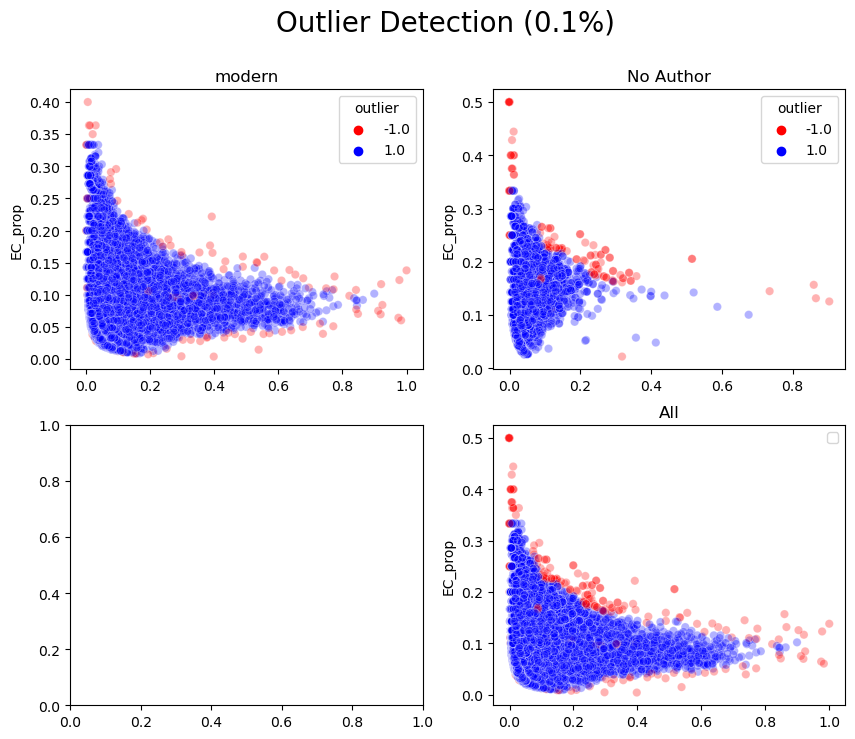

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10, 8), nrows=2, ncols=2)
axes = axes.flatten()

custom_palette1 = {-1: "red", 1: "blue"}
custom_palette2 = {-1: "orange", 1: "blue"}
custom_palette3 = {-1: "green", 1: "blue"}

sns.scatterplot(data=X_prop_df, x="len", y="EC_prop", ax=axes[0], hue="outlier", palette=custom_palette1, alpha=0.3)
axes[0].set_title("modern")
axes[0].set_xlabel("")
sns.scatterplot(data=X1_prop_df, x="len", y="EC_prop", ax=axes[1], hue="outlier", palette=custom_palette1, alpha=0.3)
axes[1].set_title("No Author")
axes[1].set_xlabel("")
# sns.scatterplot(data=X2_prop_df, x="len", y="EC_prop", ax=axes[2], hue="outlier", palette=custom_palette1, alpha=0.3)
# axes[2].set_title("Author")
# axes[2].set_xlabel("")

sns.scatterplot(data=X_prop_df, x="len", y="EC_prop", ax=axes[3], hue="outlier", palette=custom_palette1, alpha=0.3)
sns.scatterplot(data=X1_prop_df, x="len", y="EC_prop", ax=axes[3], hue="outlier", palette=custom_palette1, alpha=0.3)
# sns.scatterplot(data=X2_prop_df, x="len", y="EC_prop", ax=axes[3], hue="outlier", palette=custom_palette1, alpha=0.3)
axes[3].legend([])
axes[3].set_xlabel("")
axes[3].set_title("All")

plt.suptitle("Outlier Detection (0.1%)", fontsize=20)

In [75]:
classic_no_author = classic_no_author.drop(columns="outlier_sentence")
# classic_with_author = classic_with_author.drop(columns="outlier_sentence")
classic_no_author

KeyError: "['outlier_sentence'] not found in axis"

In [181]:
len(X1_prop_df["outlier"])

9826

In [38]:
classic_no_author_no_zero

,path,title,author,page_number,context,sentence,cleaned_content,EC_prop,len
1,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,736,"천자가 환자(宦者)를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가...","천자가 환자(宦者)를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가...","천자가 환자를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가 오지 ...",0.172414,50
2,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,736,"천자가 환자(宦者)를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가...",환자가 급히 찾으니 상서가 바야흐로 정십삼을 데리고 장안 술집에 가 술에 흠뻑 취하였다.,환자가 급히 찾으니 상서가 바야흐로 정십삼을 데리고 장안 술집에 가 술에 흠뻑 취하였다.,0.125000,49
3,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,736,"천자가 환자(宦者)를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가...",환자가 급히 명패(名牌)로 부르니 상서가 취중에 정신을 차리지 못하여 창기(娼妓)에...,환자가 급히 명패로 부르니 상서가 취중에 정신을 차리지 못하여 창기에게 붙들려 조복...,0.164706,169
4,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,737,「내 이태백을 보지 못하여 한이었는데 경을 얻었으니 어찌 이태백을 부러워하겠는가? ...,「내 이태백을 보지 못하여 한이었는데 경을 얻었으니 어찌 이태백을 부러워하겠는가? ...,내 이태백을 보지 못하여 한이었는데 경을 얻었으니 어찌 이태백을 부러워하겠는가? 짐...,0.147541,112
5,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,738,"하고, 즉시 궁녀를 명하여 백옥으로 된 책상과 유리 벼루와 금으로 만든 두꺼비 모양...","하고, 즉시 궁녀를 명하여 백옥으로 된 책상과 유리 벼루와 금으로 만든 두꺼비 모양...","하고, 즉시 궁녀를 명하여 백옥으로 된 책상과 유리 벼루와 금으로 만든 두꺼비 모양...",0.088235,62
...,...,...,...,...,...,...,...,...,...
6397,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,924,"왕이 이 말을 듣고 희허(喜許) 탄하며 이르기를,","왕이 이 말을 듣고 희허(喜許) 탄하며 이르기를,","왕이 이 말을 듣고 희허 탄하며 이르기를,",0.142857,23
6398,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,925,"「선왕이 매양 석참정 산소에 자주 친행(親行)하심을 과인이 잊지 아니하였으나, 그 ...","「선왕이 매양 석참정 산소에 자주 친행(親行)하심을 과인이 잊지 아니하였으나, 그 ...","선왕이 매양 석참정 산소에 자주 친행하심을 과인이 잊지 아니하였으나, 그 사이 삼년...",0.106061,128
6399,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,926,하고 즉시 발생하여 석참정 산소의 가 정성으로 제하고 돌아와 정사를 다스리니 위국이...,하고 즉시 발생하여 석참정 산소의 가 정성으로 제하고 돌아와 정사를 다스리니 위국이...,하고 즉시 발생하여 석참정 산소의 가 정성으로 제하고 돌아와 정사를 다스리니 위국이...,0.214286,62
6400,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,927,"세월이 여류하여 위왕의 나이 사십이 되매 삼자 일녀를 두고, 여러 형제 다 각각 자...","세월이 여류하여 위왕의 나이 사십이 되매 삼자 일녀를 두고, 여러 형제 다 각각 자...","세월이 여류하여 위왕의 나이 사십이 되매 삼자 일녀를 두고, 여러 형제 다 각각 자...",0.125000,83


In [39]:
classic_no_author_no_zero["outlier_sentence"] = X1_no_zero_res[:, 2]
# classic_with_author_no_zero["outlier_sentence"] = X2_no_zero_res[:, 2]

C:\Users\Junho\AppData\Local\Temp\ipykernel_22304\2316755532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classic_no_author_no_zero["outlier_sentence"] = X1_no_zero_res[:, 2]


In [43]:
classic_no_author_no_zero

,path,title,author,page_number,context,sentence,cleaned_content,EC_prop,len,outlier_sentence
1,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,736,"천자가 환자(宦者)를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가...","천자가 환자(宦者)를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가...","천자가 환자를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가 오지 ...",0.172414,50,1.0
2,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,736,"천자가 환자(宦者)를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가...",환자가 급히 찾으니 상서가 바야흐로 정십삼을 데리고 장안 술집에 가 술에 흠뻑 취하였다.,환자가 급히 찾으니 상서가 바야흐로 정십삼을 데리고 장안 술집에 가 술에 흠뻑 취하였다.,0.125000,49,1.0
3,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,736,"천자가 환자(宦者)를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가...",환자가 급히 명패(名牌)로 부르니 상서가 취중에 정신을 차리지 못하여 창기(娼妓)에...,환자가 급히 명패로 부르니 상서가 취중에 정신을 차리지 못하여 창기에게 붙들려 조복...,0.164706,169,1.0
4,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,737,「내 이태백을 보지 못하여 한이었는데 경을 얻었으니 어찌 이태백을 부러워하겠는가? ...,「내 이태백을 보지 못하여 한이었는데 경을 얻었으니 어찌 이태백을 부러워하겠는가? ...,내 이태백을 보지 못하여 한이었는데 경을 얻었으니 어찌 이태백을 부러워하겠는가? 짐...,0.147541,112,1.0
5,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,738,"하고, 즉시 궁녀를 명하여 백옥으로 된 책상과 유리 벼루와 금으로 만든 두꺼비 모양...","하고, 즉시 궁녀를 명하여 백옥으로 된 책상과 유리 벼루와 금으로 만든 두꺼비 모양...","하고, 즉시 궁녀를 명하여 백옥으로 된 책상과 유리 벼루와 금으로 만든 두꺼비 모양...",0.088235,62,1.0
...,...,...,...,...,...,...,...,...,...,...
6397,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,924,"왕이 이 말을 듣고 희허(喜許) 탄하며 이르기를,","왕이 이 말을 듣고 희허(喜許) 탄하며 이르기를,","왕이 이 말을 듣고 희허 탄하며 이르기를,",0.142857,23,1.0
6398,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,925,"「선왕이 매양 석참정 산소에 자주 친행(親行)하심을 과인이 잊지 아니하였으나, 그 ...","「선왕이 매양 석참정 산소에 자주 친행(親行)하심을 과인이 잊지 아니하였으나, 그 ...","선왕이 매양 석참정 산소에 자주 친행하심을 과인이 잊지 아니하였으나, 그 사이 삼년...",0.106061,128,1.0
6399,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,926,하고 즉시 발생하여 석참정 산소의 가 정성으로 제하고 돌아와 정사를 다스리니 위국이...,하고 즉시 발생하여 석참정 산소의 가 정성으로 제하고 돌아와 정사를 다스리니 위국이...,하고 즉시 발생하여 석참정 산소의 가 정성으로 제하고 돌아와 정사를 다스리니 위국이...,0.214286,62,1.0
6400,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,927,"세월이 여류하여 위왕의 나이 사십이 되매 삼자 일녀를 두고, 여러 형제 다 각각 자...","세월이 여류하여 위왕의 나이 사십이 되매 삼자 일녀를 두고, 여러 형제 다 각각 자...","세월이 여류하여 위왕의 나이 사십이 되매 삼자 일녀를 두고, 여러 형제 다 각각 자...",0.125000,83,1.0


In [44]:
classic_no_author["outlier_sentence"] = classic_no_author_no_zero["outlier_sentence"]
# classic_with_author["outlier_sentence"] = classic_with_author_no_zero["outlier_sentence"]

In [194]:
classic_no_author["outlier_sentence"].fillna(1, inplace=True)
classic_with_author["outlier_sentence"].fillna(1, inplace=True)

In [195]:
classic_no_author.to_csv("df_no_author_OD.csv", index=False, encoding="utf-8")
classic_with_author.to_csv("df_with_author_OD.csv", index=False, encoding="utf-8")

In [45]:
od_no = sum(classic_no_author["outlier_sentence"] == -1)
# od_with = sum(classic_with_author["outlier_sentence"] == -1)

print(f"Outlier 비율 (작가 X): {od_no / len(classic_no_author) * 100 :.2f}%")
print(f"Outlier 개수 (작가 X): {od_no}")
# print(f"Outlier 비율 (작가 O): {od_with / len(classic_with_author) * 100 :.2f}%")
# print(f"Outlier 개수 (작가 O): {od_with}")

Outlier 비율 (작가 X): 2.16%
Outlier 개수 (작가 X): 138


# 이상치 문장 vs 일반 문장

In [2]:
import pandas as pd

df_no_author = pd.read_csv("df_no_author_OD.csv")
df_with_author = pd.read_csv("df_with_author_OD.csv")

### 작가 X

In [2]:
import pandas as pd

df = pd.read_csv("df_no_author_OD(추가).csv")
df

,path,title,author,page_number,context,sentence,cleaned_content,EC_prop,len
0,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,735,구운몽 하,구운몽 하,구운몽 하,0.000000,5
1,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,736,"천자가 환자(宦者)를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가...","천자가 환자(宦者)를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가...","천자가 환자를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가 오지 ...",0.172414,50
2,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,736,"천자가 환자(宦者)를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가...",환자가 급히 찾으니 상서가 바야흐로 정십삼을 데리고 장안 술집에 가 술에 흠뻑 취하였다.,환자가 급히 찾으니 상서가 바야흐로 정십삼을 데리고 장안 술집에 가 술에 흠뻑 취하였다.,0.125000,49
3,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,736,"천자가 환자(宦者)를 보내어 상서를 부르자, 환자가 정사도의 집에 가 물으니 상서가...",환자가 급히 명패(名牌)로 부르니 상서가 취중에 정신을 차리지 못하여 창기(娼妓)에...,환자가 급히 명패로 부르니 상서가 취중에 정신을 차리지 못하여 창기에게 붙들려 조복...,0.164706,169
4,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,737,「내 이태백을 보지 못하여 한이었는데 경을 얻었으니 어찌 이태백을 부러워하겠는가? ...,「내 이태백을 보지 못하여 한이었는데 경을 얻었으니 어찌 이태백을 부러워하겠는가? ...,내 이태백을 보지 못하여 한이었는데 경을 얻었으니 어찌 이태백을 부러워하겠는가? 짐...,0.147541,112
...,...,...,...,...,...,...,...,...,...
6398,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,925,"「선왕이 매양 석참정 산소에 자주 친행(親行)하심을 과인이 잊지 아니하였으나, 그 ...","「선왕이 매양 석참정 산소에 자주 친행(親行)하심을 과인이 잊지 아니하였으나, 그 ...","선왕이 매양 석참정 산소에 자주 친행하심을 과인이 잊지 아니하였으나, 그 사이 삼년...",0.106061,128
6399,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,926,하고 즉시 발생하여 석참정 산소의 가 정성으로 제하고 돌아와 정사를 다스리니 위국이...,하고 즉시 발생하여 석참정 산소의 가 정성으로 제하고 돌아와 정사를 다스리니 위국이...,하고 즉시 발생하여 석참정 산소의 가 정성으로 제하고 돌아와 정사를 다스리니 위국이...,0.214286,62
6400,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,927,"세월이 여류하여 위왕의 나이 사십이 되매 삼자 일녀를 두고, 여러 형제 다 각각 자...","세월이 여류하여 위왕의 나이 사십이 되매 삼자 일녀를 두고, 여러 형제 다 각각 자...","세월이 여류하여 위왕의 나이 사십이 되매 삼자 일녀를 두고, 여러 형제 다 각각 자...",0.125000,83
6401,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,927,"세월이 여류하여 위왕의 나이 사십이 되매 삼자 일녀를 두고, 여러 형제 다 각각 자...",대대로 충신(忠臣) 열사(烈士)가 계계승승(繼繼承承)하더라.,대대로 충신 열사가 계계승승하더라.,0.000000,19


In [58]:
import numpy as np
df_no_author_outliers = classic_no_author.loc[classic_no_author["outlier_sentence"] == -1]

idx = np.random.choice(df_no_author_outliers.index, 30)

In [59]:
idx

array([4808, 3515, 3381, 4446, 5110, 5304, 5273, 4195, 3435, 5239, 3599,
       4076, 3267,  966, 4413, 3631, 3041, 2972, 4076, 5417, 4109, 4617,
       6163, 4609, 4109, 2103, 4609, 5611, 5304, 2871], dtype=int64)

In [50]:
df_no_author_outliers["len"].min()

2

c:\Users\Junho\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='len', ylabel='Density'>

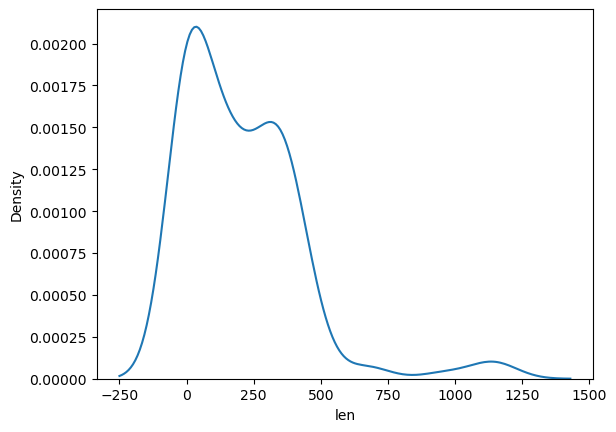

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(df_no_author_outliers["len"])

In [53]:
df_no_author_outliers

,path,title,author,page_number,context,sentence,cleaned_content,EC_prop,len,outlier_sentence
189,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,890,"「첩은 동정 용왕의 딸입니다. 부왕(父王)이 옥황상제께 조회(朝會)할 때, 장진인(...",죄를 짓고 용왕의 딸이 되었으나 인간 양상서의 첩이 돼 영화를 얻어 백년해로하다가 ...,죄를 짓고 용왕의 딸이 되었으나 인간 양상서의 첩이 돼 영화를 얻어 백년해로하다가 ...,0.161435,417,-1.0
397,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,1083,「차운하라」,「차운하라」,차운하라,0.500000,4,-1.0
722,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,1390,"계섬월과 적경홍이, ‘우리 두 사람이 월왕의 미인들에게 첫 자리를 사양 하는 것은 ...","생각하며,","생각하며,",0.333333,5,-1.0
861,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,1506,"다시 생각하되,","다시 생각하되,","다시 생각하되,",0.250000,8,-1.0
891,http://www.davincimap.co.kr/davBase/Source/dav...,금방울전(金鈴傳),미상,189,"하고, 또","하고, 또","하고, 또",0.250000,5,-1.0
...,...,...,...,...,...,...,...,...,...,...
6153,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,692,하고 죽기로써 화염을 무릅쓰고 산문(山門)을 나오니 또 좌우에서 함성이 대진(大振)...,하고 죽기로써 화염을 무릅쓰고 산문(山門)을 나오니 또 좌우에서 함성이 대진(大振)...,"하고 죽기로써 화염을 무릅쓰고 산문을 나오니 또 좌우에서 함성이 대진하고 쫓아오니,...",0.247059,169,-1.0
6163,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,702,"하고 내다르니, 장기백이 대노하여 칼을 들고 맞아 싸울새, 수합이 못하여 적장을 당...","하고 내다르니, 장기백이 대노하여 칼을 들고 맞아 싸울새, 수합이 못하여 적장을 당...","하고 내다르니, 장기백이 대노하여 칼을 들고 맞아 싸울새, 수합이 못하여 적장을 당...",0.263158,146,-1.0
6288,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,822,모두 보니 이는 도총병마(都總兵馬) 설연이라. 상이 기뻐하사 즉시 군사를 나누니 겨...,"당부하여 가로되,","당부하여 가로되,",0.400000,9,-1.0
6306,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,840,"서로 삼십여 합을 싸우더니 위왕이 거짓 패하여 달아날새, 아골대 승세(勝勢)하여 급...","서로 삼십여 합을 싸우더니 위왕이 거짓 패하여 달아날새, 아골대 승세(勝勢)하여 급...","서로 삼십여 합을 싸우더니 위왕이 거짓 패하여 달아날새, 아골대 승세하여 급히 뒤를...",0.169492,120,-1.0


In [60]:
idx

array([4808, 3515, 3381, 4446, 5110, 5304, 5273, 4195, 3435, 5239, 3599,
       4076, 3267,  966, 4413, 3631, 3041, 2972, 4076, 5417, 4109, 4617,
       6163, 4609, 4109, 2103, 4609, 5611, 5304, 2871], dtype=int64)

In [61]:
for i in idx:
    print(df_no_author_outliers["cleaned_content"][i])
    print(df_no_author_outliers["EC_prop"][i], df_no_author_outliers["len"][i])
    print()

하거늘 순신이 그 말을 듣지 아니하는지라. 배설이 군사를 버리고 도망하려 하거늘 순신이 사로잡아 인하여 버히고 앞으로 나아가고자 하더니 홀연 적선 백여 척이 군사를 몰아 나아가니 왜적이 능히 대적지 못하여 달아나거늘 순신이 즉시 쟁을 울려 군을 거두어 군중에 전령하여 가로되,
0.2631578947368421 154

분부하니
0.5 4

춘향모 듣더니
0.3333333333333333 7

하거늘 청정이 더욱 놀라 남문을 구코자 하더니, 함흥 관속들이 가만히 군기에 불을 놓고 문 지킨 왜장을 죽이고 성문을 열어 의병을 맞으니 원익이 큰 칼을 들고 당선하여 왜병 백여 명을 죽이고 성에 들어가 좌우로 충돌하여 왜병을 삼 베듯 버히고 문부의 군사 또한 남문에 불을 놓고 일시에 들어가 어지러이 짓치니 청정이 죽도록 싸워 마침내 저당치 못할 줄 헤아리고 오직 서문이 고요하거늘 군사를 거느려 급히 서문을 나매 대평으로 달아나니 동방이 이미 밝았는지라. 청정이 대군을 거느리고 대평을 넘더니 문득 영상을 좇아 주라 소리 나며 대호 왈,
0.2119205298013245 302

하고 군사를 재촉하여 나아가더니 문득 음풍이 일어나며 일성 포향에 좌우로 복병이 내달아 짓치니 함성이 천지 진동하는지라, 양장이 불의지변을 만나 수미를 돌아보지 못하여 아무리 할 줄 몰라 겨우 정신을 차려 복병을 헤치고 내달으니 천지 명랑하고 풍세 잔잔하더라.
0.2272727272727272 145

사명당이 사양치 아니하고 조선을 향하여 사배하고 그 방석을 못에 띄우고 그 위에 올라앉는지라. 그제야 모든 사람이 긴 막대로 방석을 밀치되 가라앉지 아니하고 바람을 좇아 임의로 떠서 다니거늘, 사명당을 청하여 위로하며 별당에 들이고 문무를 모아 의논 왈,
0.2318840579710145 142

하거늘 즉시 떼어 보니,
0.375 13

하고 정히 근심하더니 마침 전라도 소모관 안빈학이 피곡 천여 석을 배로 수운하여 이르렀거늘 성룡이 대희하여 일변 설진하는 뜻을 장문하고 일변으로 설진하여 기민을 구

* 너무 짧은 문장은 가사체라고 볼 수 없음
* 그 기준을 문장 길이 50으로 설정하여 그 이상의 문장들을 바꿔주자

In [62]:
df_no_author_under50 = df_no_author_outliers[df_no_author_outliers["len"] < 50]
df_no_author_under50

,path,title,author,page_number,context,sentence,cleaned_content,EC_prop,len,outlier_sentence
397,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,1083,「차운하라」,「차운하라」,차운하라,0.500000,4,-1.0
722,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,1390,"계섬월과 적경홍이, ‘우리 두 사람이 월왕의 미인들에게 첫 자리를 사양 하는 것은 ...","생각하며,","생각하며,",0.333333,5,-1.0
861,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,1506,"다시 생각하되,","다시 생각하되,","다시 생각하되,",0.250000,8,-1.0
891,http://www.davincimap.co.kr/davBase/Source/dav...,금방울전(金鈴傳),미상,189,"하고, 또","하고, 또","하고, 또",0.250000,5,-1.0
966,http://www.davincimap.co.kr/davBase/Source/dav...,금방울전(金鈴傳),미상,246,하니 부마가 부복하여 여쭈되,하니 부마가 부복하여 여쭈되,하니 부마가 부복하여 여쭈되,0.375000,15,-1.0
2366,http://www.davincimap.co.kr/davBase/Source/dav...,숙향전(淑香傳),미상,888,"하고 외우니 하였으되,","하고 외우니 하였으되,","하고 외우니 하였으되,",0.375000,12,-1.0
2462,http://www.davincimap.co.kr/davBase/Source/dav...,숙향전(淑香傳),미상,967,"하고,","하고,","하고,",0.333333,3,-1.0
2801,http://www.davincimap.co.kr/davBase/Source/dav...,숙향전(淑香傳),미상,1254,"하고,","하고,","하고,",0.333333,3,-1.0
2851,http://www.davincimap.co.kr/davBase/Source/dav...,숙향전(淑香傳),미상,1298,"하고,","하고,","하고,",0.333333,3,-1.0
2890,http://www.davincimap.co.kr/davBase/Source/dav...,숙향전(淑香傳),미상,1325,"하시고,","하시고,","하시고,",0.250000,4,-1.0


In [24]:
df_no_author_under70 = df_no_author_outliers[df_no_author_outliers["len"] < 70]
df_no_author_under70

,path,title,author,page_number,context,sentence,cleaned_content,EC_prop,len,outlier_sentence
3,http://www.davincimap.co.kr/davBase/Source/dav...,금방울전(金鈴傳),미상,26,하고 업고 오다가 생각하되,하고 업고 오다가 생각하되,하고 업고 오다가 생각하되,0.500000,14,-1.0
4,http://www.davincimap.co.kr/davBase/Source/dav...,금방울전(金鈴傳),미상,32,"하며 더욱 울어 마지 않더라. 장 처사 위로하며,",하며 더욱 울어 마지 않더라.,하며 더욱 울어 마지 않더라.,0.300000,16,-1.0
14,http://www.davincimap.co.kr/davBase/Source/dav...,금방울전(金鈴傳),미상,83,부인이 재삼 말하되. 곧이 듣지 않고 이 날 밤에 자더니 방울이 가마에 들었다가 밤...,전날 밤에 공이 자다가 크게 소리 지르며 일어나거늘 부인이 놀라 붙들고 묻되.,전날 밤에 공이 자다가 크게 소리 지르며 일어나거늘 부인이 놀라 붙들고 묻되.,0.304348,43,-1.0
15,http://www.davincimap.co.kr/davBase/Source/dav...,금방울전(金鈴傳),미상,85,"공이 말하되,","공이 말하되,","공이 말하되,",0.200000,7,-1.0
17,http://www.davincimap.co.kr/davBase/Source/dav...,금방울전(金鈴傳),미상,111,"하고, 해룡을 가리켜 말하되,","하고, 해룡을 가리켜 말하되,","하고, 해룡을 가리켜 말하되,",0.300000,16,-1.0
...,...,...,...,...,...,...,...,...,...,...
443,http://www.davincimap.co.kr/davBase/Source/dav...,홍계월전(洪桂月傳),NaN,292,"하니 종시 듣지 아니 하고 간청하거늘 원수 왈,","하니 종시 듣지 아니 하고 간청하거늘 원수 왈,","하니 종시 듣지 아니 하고 간청하거늘 원수 왈,",0.307692,26,-1.0
445,http://www.davincimap.co.kr/davBase/Source/dav...,홍계월전(洪桂月傳),NaN,322,"하니 철통골이 엿자오되,","하니 철통골이 엿자오되,","하니 철통골이 엿자오되,",0.285714,13,-1.0
453,http://www.davincimap.co.kr/davBase/Source/dav...,홍계월전(洪桂月傳),NaN,550,"하고 통곡하거늘,","하고 통곡하거늘,","하고 통곡하거늘,",0.400000,9,-1.0
455,http://www.davincimap.co.kr/davBase/Source/dav...,홍계월전(洪桂月傳),NaN,568,하시며,하시며,하시며,0.333333,3,-1.0


In [63]:
for i in df_no_author_under70[df_no_author_under70["len"] >= 50]["cleaned_content"]:
    print(i)

NameError: name 'df_no_author_under70' is not defined

In [64]:
for i in df_no_author_under50[df_no_author_under50["len"] >= 30]["cleaned_content"]:
    print(i)

In [65]:
df_no_author_under30 = df_no_author_outliers[df_no_author_outliers["len"] < 30]
df_no_author_under30

,path,title,author,page_number,context,sentence,cleaned_content,EC_prop,len,outlier_sentence
397,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,1083,「차운하라」,「차운하라」,차운하라,0.500000,4,-1.0
722,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,1390,"계섬월과 적경홍이, ‘우리 두 사람이 월왕의 미인들에게 첫 자리를 사양 하는 것은 ...","생각하며,","생각하며,",0.333333,5,-1.0
861,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,1506,"다시 생각하되,","다시 생각하되,","다시 생각하되,",0.250000,8,-1.0
891,http://www.davincimap.co.kr/davBase/Source/dav...,금방울전(金鈴傳),미상,189,"하고, 또","하고, 또","하고, 또",0.250000,5,-1.0
966,http://www.davincimap.co.kr/davBase/Source/dav...,금방울전(金鈴傳),미상,246,하니 부마가 부복하여 여쭈되,하니 부마가 부복하여 여쭈되,하니 부마가 부복하여 여쭈되,0.375000,15,-1.0
2366,http://www.davincimap.co.kr/davBase/Source/dav...,숙향전(淑香傳),미상,888,"하고 외우니 하였으되,","하고 외우니 하였으되,","하고 외우니 하였으되,",0.375000,12,-1.0
2462,http://www.davincimap.co.kr/davBase/Source/dav...,숙향전(淑香傳),미상,967,"하고,","하고,","하고,",0.333333,3,-1.0
2801,http://www.davincimap.co.kr/davBase/Source/dav...,숙향전(淑香傳),미상,1254,"하고,","하고,","하고,",0.333333,3,-1.0
2851,http://www.davincimap.co.kr/davBase/Source/dav...,숙향전(淑香傳),미상,1298,"하고,","하고,","하고,",0.333333,3,-1.0
2890,http://www.davincimap.co.kr/davBase/Source/dav...,숙향전(淑香傳),미상,1325,"하시고,","하시고,","하시고,",0.250000,4,-1.0


In [66]:
df_no_author_under30["sentence"]

397                        「차운하라」
722                         생각하며,
861                      다시 생각하되,
891                         하고, 또
966               하니 부마가 부복하여 여쭈되
2366                 하고 외우니 하였으되,
2462                          하고,
2801                          하고,
2851                          하고,
2890                         하시고,
2917                     마음이 바쁜지라
2924                 혼금이 지엄(至嚴)하고
2953                      사또 분부하되
2972                      사또 분부하되
2987                      수노 여쭈오되
2991                      수노 여주오되
3021                           하며
3041                       사또 웃으며
3043                     이윽히 앉았더니
3060                     춘향이 포악하되
3067                      춘향이 떨치며
3140                           하며
3179             하고 외치고 가니 춘향이 듣고
3183             불러 놓(으)니 봉사 대답하되
3214                     춘향이 대답하되
3312                      하며 달려들어
3337                           하고
3342                      어사 들어가며
3372                     어사또 반겨하며
3381          

In [67]:
df_no_author_over50 = df_no_author_outliers[df_no_author_outliers["len"] >= 50]
df_no_author_over50

,path,title,author,page_number,context,sentence,cleaned_content,EC_prop,len,outlier_sentence
189,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,890,"「첩은 동정 용왕의 딸입니다. 부왕(父王)이 옥황상제께 조회(朝會)할 때, 장진인(...",죄를 짓고 용왕의 딸이 되었으나 인간 양상서의 첩이 돼 영화를 얻어 백년해로하다가 ...,죄를 짓고 용왕의 딸이 되었으나 인간 양상서의 첩이 돼 영화를 얻어 백년해로하다가 ...,0.161435,417,-1.0
984,http://www.davincimap.co.kr/davBase/Source/dav...,금방울전(金鈴傳),미상,260,하더니 만춘이 가만히 활을 쏘매 양춘이 무심중 살을 왼편 어깨에 맞아 말에서 떨어지...,하더니 만춘이 가만히 활을 쏘매 양춘이 무심중 살을 왼편 어깨에 맞아 말에서 떨어지...,하더니 만춘이 가만히 활을 쏘매 양춘이 무심중 살을 왼편 어깨에 맞아 말에서 떨어지...,0.231250,312,-1.0
1057,http://www.davincimap.co.kr/davBase/Source/dav...,금방울전(金鈴傳),미상,308,"하니 태수가 즉시 지휘하여 사흘 안에 치산하고, 소룡을 불러 오라 하니 이 때 소룡...","하니 태수가 즉시 지휘하여 사흘 안에 치산하고, 소룡을 불러 오라 하니 이 때 소룡...","하니 태수가 즉시 지휘하여 사흘 안에 치산하고, 소룡을 불러 오라 하니 이 때 소룡...",0.236111,282,-1.0
1063,http://www.davincimap.co.kr/davBase/Source/dav...,금방울전(金鈴傳),미상,313,이 때 어사의 행차가 경사로 향할새 길이 뇌양 고을을 지나게 되더라. 뇌양에 들어 ...,뇌양에 들어 객사에 숙소할새 본관에 들어가 본관과 더불어 담화하게 되니 자연히 친하...,뇌양에 들어 객사에 숙소할새 본관에 들어가 본관과 더불어 담화하게 되니 자연히 친하...,0.240000,147,-1.0
1488,http://www.davincimap.co.kr/davBase/Source/dav...,숙향전(淑香傳),미상,681,세월이 여류(如流)하여 추칠월(秋七月) 망간(望間)이 됨에 양풍(凉風)은 소슬하고 ...,세월이 여류(如流)하여 추칠월(秋七月) 망간(望間)이 됨에 양풍(凉風)은 소슬하고 ...,"세월이 여류하여 추칠월 망간이 됨에 양풍은 소슬하고 밝은 보름달은 조요한지라, 낭자...",0.226667,147,-1.0
...,...,...,...,...,...,...,...,...,...,...
6150,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,689,"하거늘, 구골대 차언(此言)을 듣고 대열하여 위왕을 잡으려 하고 거창산으로 군을 몰...","하거늘, 구골대 차언(此言)을 듣고 대열하여 위왕을 잡으려 하고 거창산으로 군을 몰...","하거늘, 구골대 차언을 듣고 대열하여 위왕을 잡으려 하고 거창산으로 군을 몰아 들어...",0.236842,157,-1.0
6153,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,692,하고 죽기로써 화염을 무릅쓰고 산문(山門)을 나오니 또 좌우에서 함성이 대진(大振)...,하고 죽기로써 화염을 무릅쓰고 산문(山門)을 나오니 또 좌우에서 함성이 대진(大振)...,"하고 죽기로써 화염을 무릅쓰고 산문을 나오니 또 좌우에서 함성이 대진하고 쫓아오니,...",0.247059,169,-1.0
6163,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,702,"하고 내다르니, 장기백이 대노하여 칼을 들고 맞아 싸울새, 수합이 못하여 적장을 당...","하고 내다르니, 장기백이 대노하여 칼을 들고 맞아 싸울새, 수합이 못하여 적장을 당...","하고 내다르니, 장기백이 대노하여 칼을 들고 맞아 싸울새, 수합이 못하여 적장을 당...",0.263158,146,-1.0
6306,http://www.davincimap.co.kr/davBase/Source/dav...,현수문전 (경판본)(玄壽文傳),NaN,840,"서로 삼십여 합을 싸우더니 위왕이 거짓 패하여 달아날새, 아골대 승세(勝勢)하여 급...","서로 삼십여 합을 싸우더니 위왕이 거짓 패하여 달아날새, 아골대 승세(勝勢)하여 급...","서로 삼십여 합을 싸우더니 위왕이 거짓 패하여 달아날새, 아골대 승세하여 급히 뒤를...",0.169492,120,-1.0


### 작가 O

In [44]:
df_with_author_outliers = df_with_author.loc[df_with_author["outlier_sentence"] == -1]

In [35]:
df_with_author_outliers.shape

(167, 10)

In [36]:
df_with_author_outliers_under50 = df_with_author_outliers[df_with_author_outliers["len"] < 50]
df_with_author_outliers_under50.shape

(111, 10)

In [38]:
df_with_author_outliers_under50["cleaned_content"]

1      또 집을 마련하라고 하면 사양하며,
2           대사가 대답하지 아니하고,
4                  또 하였으되,
6                   다 이르되,
9                   다 이르되,
              ...         
162           빛이 화려하고 밝았으니
163             연호를 감로라 하고
164           맞이하여 정승을 삼아서
165              국화는 오지 않고
166               상교에서 죽으매
Name: cleaned_content, Length: 111, dtype: object

In [41]:
df_with_author_outliers_under50[df_with_author_outliers_under50["len"] >= 30]["cleaned_content"]

30                       강절은 크게 웃고 나아와 자리를 펴고 누어 하세하시니라
41                       유공이 가깝게 끌어서 슬하에 앉히고 무애하여 위로하고,
46    하고 무창으로 나가서 관청에 복명하자 관원이 크게 놀라서 급히 맞아 당상으로 인도하면서,
57       병이 들어도 무당을 불러오지 말고, 제사하면서 종을 불러다 재 들이지 말아야 한다.
Name: cleaned_content, dtype: object

In [51]:
df_no_author_outliers["cleaned_content"][41]

'"안그렇습니다. 지난번에 만약 4천석을 판매하셨다면 4만 냥을 받았을 것이요, 4만 냥을 가지고 경향간에서 백화를 사들였다가 적당한 시기에 냈다면 12만냥은 벌었을 것 아닙니까. 이 12만냥으로 지금 곡식을 사들이면 12만석이 안 되겠어요. 6만석은 12만석의 반입니다. 12만석을 안취하고 6만석을 취하시니 이것이 청렴이옵고, 이에 상관을 따지지 않고 굶어 죽어가는 마을 사람들에게 베풀어주시고 조금도 보답을 바라지 않으시니 이것이 겸애십니다. 저희들이 이해를 가지고 논하더라도 500호 1,300여 구가 지난 여름 크게 기근이 들었을 때 빚을 얻을래야 아예 길도 없었을뿐더러, 설사 돈이 얻어진다 하여도 그 이자가 필시 5할을 내려오지 않으며, 그 돈으로 곡식을 바꿀래야 곡식은 귀하고 돈이 천하여 돈을 가진 사람은 장터에 가득한데 곡식을 낼 사람은 거의 없었지요. 이런 판국에서 살아날 수 있었겠습니까? 게다가 때를 안 잃고 농사를 지어 집집마다 안은해질 수 있었겠습니까? 이 곡식을 안 받으시면 소인들이 노비로 자원하여 만에 한 끝이나마 은혜를 갚겠습니다."'

In [45]:
df_with_author_outliers_over50 = df_with_author_outliers[df_with_author_outliers["len"] >= 50]
df_with_author_outliers_over50

,path,title,author,page_number,context,sentence,cleaned_content,EC_prop,len,outlier_sentence
47,http://www.davincimap.co.kr/davBase/Source/dav...,공방전(孔方傳),임춘,16,"""내가 전일에 폐하를 만나 뵙고, 나 혼자서 온 천하의 정치를 도맡아 보았었다. 그...","""내가 전일에 폐하를 만나 뵙고, 나 혼자서 온 천하의 정치를 도맡아 보았었다. 그...","""내가 전일에 폐하를 만나 뵙고, 나 혼자서 온 천하의 정치를 도맡아 보았었다. 그...",0.120172,448,-1.0
231,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,75,"「소자가 죄 있어 아뢸 말씀이 없지만, 용궁에서 술을 먹은 것은 주인이 힘써 권하였...","「소자가 죄 있어 아뢸 말씀이 없지만, 용궁에서 술을 먹은 것은 주인이 힘써 권하였...","소자가 죄 있어 아뢸 말씀이 없지만, 용궁에서 술을 먹은 것은 주인이 힘써 권하였기...",0.147239,292,-1.0
353,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,183,양생이 객점에서 자는데 마음에 잊혀지지 않아 잠을 이루지 못하고 새벽 닭 우는 소리...,생이 크게 놀라 옷을 떨쳐 입고 문 밖에 내달아 보니 피난하는 사람들이 분주하게 달...,생이 크게 놀라 옷을 떨쳐 입고 문 밖에 내달아 보니 피난하는 사람들이 분주하게 달...,0.209877,153,-1.0
524,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,336,"「어리 석지만 이번 과거는 내 손 안에 있어 염려치 아니하지만, 평생에 정한 뜻이 ...","「어리 석지만 이번 과거는 내 손 안에 있어 염려치 아니하지만, 평생에 정한 뜻이 ...","어리 석지만 이번 과거는 내 손 안에 있어 염려치 아니하지만, 평생에 정한 뜻이 있...",0.232143,105,-1.0
544,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,356,"「정사도가 요사이 늙고 병들어 벼슬을 사양하고 원림(園林)에 돌아와 풍류만 일삼고,...","「정사도가 요사이 늙고 병들어 벼슬을 사양하고 원림(園林)에 돌아와 풍류만 일삼고,...","정사도가 요사이 늙고 병들어 벼슬을 사양하고 원림에 돌아와 풍류만 일삼고, 부인 최...",0.145455,323,-1.0
675,http://www.davincimap.co.kr/davBase/Source/dav...,구운몽(九雲夢),김만중,478,「양랑은 진실로 만고의 풍류 남자로다. 옛적 왕유(王維)도 악공(樂工)이 되어 태평...,「양랑은 진실로 만고의 풍류 남자로다. 옛적 왕유(王維)도 악공(樂工)이 되어 태평...,양랑은 진실로 만고의 풍류 남자로다. 옛적 왕유도 악공이 되어 태평공주의 집에 들어...,0.120000,141,-1.0
1001,http://www.davincimap.co.kr/davBase/Source/dav...,국선생전(麴先生傳),이규보,20,"""신은 본래 가난한 집 자식이옵니다. 어려서는 몸이 빈천해서 이곳 저곳으로 남에게 ...","""신은 본래 가난한 집 자식이옵니다. 어려서는 몸이 빈천해서 이곳 저곳으로 남에게 ...","""신은 본래 가난한 집 자식이옵니다. 어려서는 몸이 빈천해서 이곳 저곳으로 남에게 ...",0.118577,468,-1.0
1210,http://www.davincimap.co.kr/davBase/Source/dav...,남령전(南靈傳),이옥,8,남령이 명령을 받들어 병부절(兵符節)을 차고서 군중(軍中)에 임해서 금대(金臺;여기...,남령이 명령을 받들어 병부절(兵符節)을 차고서 군중(軍中)에 임해서 금대(金臺;여기...,남령이 명령을 받들어 병부절을 차고서 군중에 임해서 금대에다가 봉수대를 설치하고 운...,0.212121,135,-1.0
2343,http://www.davincimap.co.kr/davBase/Source/dav...,마장전(馬駔傳),박지원,29,"""네가 이 말을 어떻게 알아듣는단 말이냐? 그가 잘하는데도 일부러 소리쳐 가며 책망...","""네가 이 말을 어떻게 알아듣는단 말이냐? 그가 잘하는데도 일부러 소리쳐 가며 책망...","""네가 이 말을 어떻게 알아듣는단 말이냐? 그가 잘하는데도 일부러 소리쳐 가며 책망...",0.134328,397,-1.0
2597,http://www.davincimap.co.kr/davBase/Source/dav...,만복사저포기(萬福寺樗浦記),김시습,223,"""제가 법도를 어겼다는 것은 저도 잘 알고 있습니다. 저도 어렸을 때에 『시경』과『...","""제가 법도를 어겼다는 것은 저도 잘 알고 있습니다. 저도 어렸을 때에 『시경』과『...","""제가 법도를 어겼다는 것은 저도 잘 알고 있습니다. 저도 어렸을 때에 시경과서경을...",0.114187,540,-1.0


In [68]:
df_no_author_outliers.to_csv("outlier_sentence(추가).csv", index=False)

In [47]:
df_outliers = pd.concat([df_no_author_over50, df_with_author_outliers_over50], axis=0)
df_outliers.to_csv("outlier_sentence.csv", index=False, encoding="utf-8")

In [1]:
import pandas as pd
df_outliers = pd.read_csv("outlier_sentence.csv")
df_outliers

,path,title,author,page_number,context,sentence,cleaned_content,EC_prop,len,outlier_sentence
0,http://www.davincimap.co.kr/davBase/Source/dav...,귀향(歸鄕),NaN,51,"""안그렇습니다. 지난번에 만약 4천석을 판매하셨다면 4만 냥을 받았을 것이요, 4만...","""안그렇습니다. 지난번에 만약 4천석을 판매하셨다면 4만 냥을 받았을 것이요, 4만...","""안그렇습니다. 지난번에 만약 4천석을 판매하셨다면 4만 냥을 받았을 것이요, 4만...",0.115132,540,-1.0
1,http://www.davincimap.co.kr/davBase/Source/dav...,금방울전(金鈴傳),미상,8,“소자는 동해 용왕의 셋째 아들이러니 남해왕이 되어 부부(夫婦)가 친영(親迎)하여 ...,“소자는 동해 용왕의 셋째 아들이러니 남해왕이 되어 부부(夫婦)가 친영(親迎)하여 ...,“소자는 동해 용왕의 셋째 아들이러니 남해왕이 되어 부부가 친영하여 오다가 동해 호...,0.194690,223,-1.0
2,http://www.davincimap.co.kr/davBase/Source/dav...,금방울전(金鈴傳),미상,16,이 때 천자가 하늘에서 명을 받으시니 해내(海內)가 안정치 못하여 혹은 위왕이라 하...,이 때 천자가 하늘에서 명을 받으시니 해내(海內)가 안정치 못하여 혹은 위왕이라 하...,이 때 천자가 하늘에서 명을 받으시니 해내가 안정치 못하여 혹은 위왕이라 하고 혹은...,0.202532,160,-1.0
3,http://www.davincimap.co.kr/davBase/Source/dav...,금방울전(金鈴傳),미상,34,하고 부부가 서로 슬픔을 머금고 두루 찾아보았으나 마침 조나라 장수 위세기에게 잡히...,하고 부부가 서로 슬픔을 머금고 두루 찾아보았으나 마침 조나라 장수 위세기에게 잡히...,하고 부부가 서로 슬픔을 머금고 두루 찾아보았으나 마침 조나라 장수 위세기에게 잡히...,0.181818,247,-1.0
4,http://www.davincimap.co.kr/davBase/Source/dav...,금방울전(金鈴傳),미상,35,이 때 성남 조계촌에 김삼랑이란 사람이 있으니 호협(豪俠) 방탕(放蕩)하여 그의 처...,이 때 성남 조계촌에 김삼랑이란 사람이 있으니 호협(豪俠) 방탕(放蕩)하여 그의 처...,이 때 성남 조계촌에 김삼랑이란 사람이 있으니 호협 방탕하여 그의 처 막씨의 얼굴이...,0.167939,257,-1.0
...,...,...,...,...,...,...,...,...,...,...
352,http://www.davincimap.co.kr/davBase/Source/dav...,홍길동전 (완판36장본),허균,293,"하고 떠나 낙천현에 이르니, 그 땅에 만석군 부자 있으되 성명은 백용이라. 남자 없...","고서를 섭렵하여 이두의 문장을 가졌으며, 색은 장강을 비웃고, 사덕은 태사를 봉받아...","고서를 섭렵하여 이두의 문장을 가졌으며, 색은 장강을 비웃고, 사덕은 태사를 봉받아...",0.184874,233,-1.0
353,http://www.davincimap.co.kr/davBase/Source/dav...,홍길동전 (완판36장본),허균,296,"이때에 길동이 망당산에 들어가 약을 캐더니, 날이 저문 후에 방황하며 향할 바를 알...",길동 가만히 활을 잡아 그 상좌에 앉은 장수를 쏘니 정히 가슴에 맞는지라. 을동이 ...,길동 가만히 활을 잡아 그 상좌에 앉은 장수를 쏘니 정히 가슴에 맞는지라. 을동이 ...,0.211538,199,-1.0
354,http://www.davincimap.co.kr/davBase/Source/dav...,홍길동전 (완판36장본),허균,318,"한대, 을동이 대로하여 칼을 들어 길동을 치려 하거늘, 길동이 대적코자 하나 손에 ...","한대, 을동이 대로하여 칼을 들어 길동을 치려 하거늘, 길동이 대적코자 하나 손에 ...","한대, 을동이 대로하여 칼을 들어 길동을 치려 하거늘, 길동이 대적코자 하나 손에 ...",0.180451,263,-1.0
355,http://www.davincimap.co.kr/davBase/Source/dav...,홍길동전 (완판36장본),허균,396,"하고 군사를 호령하여 급하 따르더니, 이때에 길동이 장대에서 보다가 율도왕이 양관 ...","율도왕 꾀에 빠진 줄 알고 세궁하여 군사를 돌려 나오더니, 양관 어귀에 미치니 길동...","율도왕 꾀에 빠진 줄 알고 세궁하여 군사를 돌려 나오더니, 양관 어귀에 미치니 길동...",0.213115,247,-1.0


In [5]:
df_outliers.loc[11, "cleaned_content"]

'이에 여러 사람이며 장공들이 대단히 기꺼워하였음은 다시 말할 것도 없었으며, 방울은 더욱더욱 작아지며 대추씨만 하여지더니 기름 위에 둥둥 떠다니다가 가라앉거늘 건지려고 나아가서 보니 그렇게 끓던 기름이 엉기어 쇠와 같이 되었으매, 지현이 한편 괴이히 여기고 한편 크게 노하여 막씨를 하옥하라 하고 내당에 들어가니 부인이 바삐 끌어 말하기를.'

In [3]:
print(df_outliers.loc[2, "cleaned_content"])

이 때 천자가 하늘에서 명을 받으시니 해내가 안정치 못하여 혹은 위왕이라 하고 혹은 국왕이라 칭하며 남서로 노략하니 일경이 진동하여 피란하는 자 무수하였는데 장공이 그 가운데 섞이어 피난할 제 추병이 정히 위급한지라 부부 서로 해룡을 둘러업고 달아나더니 운이 다하매 부인이 울며 말하기를


## 이상치 변환 문장

In [76]:
a = ""

with open("prose.txt", "r") as f:
    a = f.read()

a

'[Sentence 0]. "안그렇습니다. 지난번에 만약 4천석을 판매하셨다면 4만 냥을 받았을 것이요, 4만 냥을 가지고 경향간에서 백화를 사들였다가 적당한 시기에 냈다면 12만냥은 벌었을 것 아닙니까. 이 12만냥으로 지금 곡식을 사들이면 12만석이 안 되겠어요. 6만석은 12만석의 반입니다. 12만석을 안취하고 6만석을 취하시니 이것이 청렴이옵고, 이에 상관을 따지지 않고 굶어 죽어가는 마을 사람들에게 베풀어주시고 조금도 보답을 바라지 않으시니 이것이 겸애십니다. 저희들이 이해를 가지고 논하더라도 500호 1,300여 구가 지난 여름 크게 기근이 들었을 때 빚을 얻을래야 아예 길도 없었을뿐더러, 설사 돈이 얻어진다 하여도 그 이자가 필시 5할을 내려오지 않으며, 그 돈으로 곡식을 바꿀래야 곡식은 귀하고 돈이 천하여 돈을 가진 사람은 장터에 가득한데 곡식을 낼 사람은 거의 없었지요. 이런 판국에서 살아날 수 있었겠습니까? 게다가 때를 안 잃고 농사를 지어 집집마다 안은해질 수 있었겠습니까? 이 곡식을 안 받으시면 소인들이 노비로 자원하여 만에 한 끝이나마 은혜를 갚겠습니다." -> [산문]\n"안그렇습니다. 지난번에 4천석을 판매하셨다면 4만 냥을 받았을 것이요, 4만 냥을 가지고 경향간에서 백화를 사들였다가 적당한 시기에 냈다면 12만냥은 벌었을 것이요. 12만냥으로 지금 곡식을 사들이면 12만석이 안 되겠어요. 6만석은 12만석의 반입니다. 12만석을 안 취하고 6만석을 취하시니 이것이 청렴이옵고, 이에 상관을 따지지 않고 굶어 죽어가는 마을 사람들에게 베풀어주시고 조금도 보답을 바라지 않으시니 이것이 겸애십니다.\n저희들이 이해를 가지고 논하더라도 500호 1,300여 구가 지난 여름 크게 기근이 들었을 때 빚을 얻을래야 아예 길도 없었을뿐더러, 설사 돈이 얻어진다 하여도 그 이자가 필시 5할을 내려오지 않으며, 그 돈으로 곡식을 바꿀래야 곡식은 귀하고 돈이 천하여 돈을 가진 사람은 장터에 가득한데 곡식을 낼 사람은 거의 없었지요. 이런 판국에서 살아

In [77]:
import re
sentences = re.split(r'\[Sentence \d+\]\.\s', a)

# 빈 문자열 제거
sentences = [sentence for sentence in sentences if sentence]

len(sentences)

357

In [78]:
from collections import Counter

# 정규표현식을 사용하여 [Sentence ~] 패턴 안의 숫자를 추출
numbers = re.findall(r'\[Sentence (\d+)\]', a)

# 숫자의 빈도를 계산
counter = Counter(numbers)

# 빈도가 1보다 큰 숫자 (즉, 중복된 숫자)들을 찾기
duplicates = [number for number, count in counter.items() if count > 1]

# 결과 출력
for number in duplicates:
    print(number)

In [79]:
splitted = [re.split(r'\-\>', sentence) for sentence in sentences]
splitted = [[original, re.sub(r'\s*\[산문\]\n', '', translation)]for original, translation in splitted]
splitted = [[original, re.sub(r'\n', ' ', translation)]for original, translation in splitted]
splitted

[['"안그렇습니다. 지난번에 만약 4천석을 판매하셨다면 4만 냥을 받았을 것이요, 4만 냥을 가지고 경향간에서 백화를 사들였다가 적당한 시기에 냈다면 12만냥은 벌었을 것 아닙니까. 이 12만냥으로 지금 곡식을 사들이면 12만석이 안 되겠어요. 6만석은 12만석의 반입니다. 12만석을 안취하고 6만석을 취하시니 이것이 청렴이옵고, 이에 상관을 따지지 않고 굶어 죽어가는 마을 사람들에게 베풀어주시고 조금도 보답을 바라지 않으시니 이것이 겸애십니다. 저희들이 이해를 가지고 논하더라도 500호 1,300여 구가 지난 여름 크게 기근이 들었을 때 빚을 얻을래야 아예 길도 없었을뿐더러, 설사 돈이 얻어진다 하여도 그 이자가 필시 5할을 내려오지 않으며, 그 돈으로 곡식을 바꿀래야 곡식은 귀하고 돈이 천하여 돈을 가진 사람은 장터에 가득한데 곡식을 낼 사람은 거의 없었지요. 이런 판국에서 살아날 수 있었겠습니까? 게다가 때를 안 잃고 농사를 지어 집집마다 안은해질 수 있었겠습니까? 이 곡식을 안 받으시면 소인들이 노비로 자원하여 만에 한 끝이나마 은혜를 갚겠습니다." ',
  '"안그렇습니다. 지난번에 4천석을 판매하셨다면 4만 냥을 받았을 것이요, 4만 냥을 가지고 경향간에서 백화를 사들였다가 적당한 시기에 냈다면 12만냥은 벌었을 것이요. 12만냥으로 지금 곡식을 사들이면 12만석이 안 되겠어요. 6만석은 12만석의 반입니다. 12만석을 안 취하고 6만석을 취하시니 이것이 청렴이옵고, 이에 상관을 따지지 않고 굶어 죽어가는 마을 사람들에게 베풀어주시고 조금도 보답을 바라지 않으시니 이것이 겸애십니다. 저희들이 이해를 가지고 논하더라도 500호 1,300여 구가 지난 여름 크게 기근이 들었을 때 빚을 얻을래야 아예 길도 없었을뿐더러, 설사 돈이 얻어진다 하여도 그 이자가 필시 5할을 내려오지 않으며, 그 돈으로 곡식을 바꿀래야 곡식은 귀하고 돈이 천하여 돈을 가진 사람은 장터에 가득한데 곡식을 낼 사람은 거의 없었지요. 이런 판국에서 살아날 수 있었겠습니까? 게다가 

## 바른 태깅 후 연결어미 비율 다시 비교하기

In [80]:
from NLP_utils import *
import os
import json
from tqdm import tqdm
import sys
import google.protobuf.text_format as tf
from bareunpy import Tagger

API_KEY="koba-BRBCJ3A-OA4UPJY-QXV5GSI-MU2WLMY"  # 본인 API 키 등록
tagger = Tagger(API_KEY, 'localhost')

In [81]:
from tqdm import tqdm

# 고전 소설 (번역 전)
originals = []

for sentence, _ in tqdm(splitted):
    pos_text = tagger.pos(sentence)

    count = 0   # 연결 어미 count
    for text in pos_text:
        if text[1] == "EC":
            count += 1
    prop = count / len(pos_text)
    originals.append(prop)

100%|██████████| 357/357 [00:54<00:00,  6.57it/s]


In [82]:
from tqdm import tqdm

# 고전 소설 (번역 후)
translations = []

for _, sentence in tqdm(splitted):
    pos_text = tagger.pos(sentence)

    count = 0   # 연결 어미 count
    for text in pos_text:
        if text[1] == "EC":
            count += 1
    prop = count / len(pos_text)
    translations.append(prop)

100%|██████████| 357/357 [01:14<00:00,  4.79it/s]


c:\Users\Junho\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Junho\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Junho\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Compare EC prop')

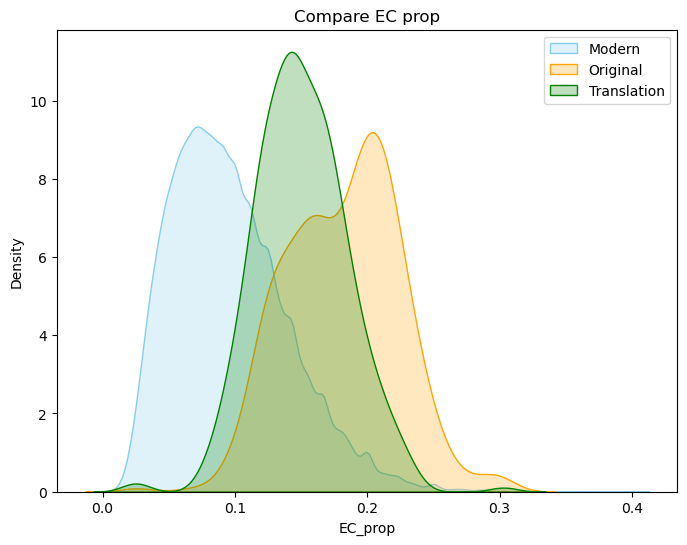

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 6))

sns.kdeplot(X_prop_df["EC_prop"], ax=ax, color="skyblue", fill=True)
sns.kdeplot(originals, ax=ax, color="orange", fill=True)
sns.kdeplot(translations, ax=ax, color="green", fill=True)
ax.set_xlabel("EC_prop")
ax.legend(["Modern", "Original", "Translation"])

plt.title("Compare EC prop")

c:\Users\Junho\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Junho\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Compare EC prop')

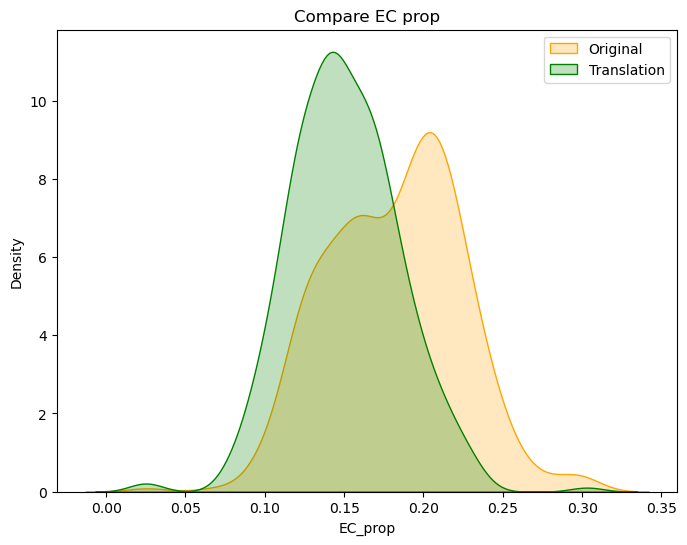

In [84]:
fig, ax = plt.subplots(figsize=(8, 6))

# sns.kdeplot(X_prop_df["EC_prop"], ax=ax, color="skyblue", fill=True)
sns.kdeplot(originals, ax=ax, color="orange", fill=True)
sns.kdeplot(translations, ax=ax, color="green", fill=True)
ax.set_xlabel("EC_prop")
ax.legend(["Original", "Translation"])

plt.title("Compare EC prop")

In [85]:
# 두 개 비교를 위해 데이터프레임화

original_text = [sentence for sentence, _ in splitted]
translation_text = [sentence for _, sentence in splitted]

original_df = pd.DataFrame(data=original_text,
                           columns=["text"])
translation_df = pd.DataFrame(data=translation_text,
                           columns=["text"])
original_df["len"] = original_df["text"].apply(lambda x: len(x))
translation_df["len"] = translation_df["text"].apply(lambda x: len(x))

original_df["EC_prop"] = originals
translation_df["EC_prop"] = translations

In [86]:
original_df

,text,len,EC_prop
0,"""안그렇습니다. 지난번에 만약 4천석을 판매하셨다면 4만 냥을 받았을 것이요, 4만...",541,0.115132
1,“소자는 동해 용왕의 셋째 아들이러니 남해왕이 되어 부부가 친영하여 오다가 동해 호...,224,0.194690
2,이 때 천자가 하늘에서 명을 받으시니 해내가 안정치 못하여 혹은 위왕이라 하고 혹은...,161,0.202532
3,하고 부부가 서로 슬픔을 머금고 두루 찾아보았으나 마침 조나라 장수 위세기에게 잡히...,248,0.181818
4,이 때 성남 조계촌에 김삼랑이란 사람이 있으니 호협 방탕하여 그의 처 막씨의 얼굴이...,258,0.167939
...,...,...,...
352,"고서를 섭렵하여 이두의 문장을 가졌으며, 색은 장강을 비웃고, 사덕은 태사를 봉받아...",234,0.184874
353,길동 가만히 활을 잡아 그 상좌에 앉은 장수를 쏘니 정히 가슴에 맞는지라. 을동이 ...,200,0.211538
354,"한대, 을동이 대로하여 칼을 들어 길동을 치려 하거늘, 길동이 대적코자 하나 손에 ...",264,0.180451
355,"율도왕 꾀에 빠진 줄 알고 세궁하여 군사를 돌려 나오더니, 양관 어귀에 미치니 길동...",248,0.213115


In [87]:
# 전처리
X1 = [[x, y] for x, y in zip(original_df["len"], original_df["EC_prop"])]
X1_no_zero = [[x, y] for x, y in X1 if y != 0]

X2 = [[x, y] for x, y in zip(translation_df["len"], translation_df["EC_prop"])]
X2_no_zero = [[x, y] for x, y in X2 if y != 0]

X1_no_zero = np.array(X1_no_zero)
X2_no_zero = np.array(X2_no_zero)

In [88]:
# 스케일링
scaled_vector1 = (X1_no_zero[:, 0] - min_val) / (max_val - min_val)
scaled_vector2 = (X2_no_zero[:, 0] - min_val) / (max_val - min_val)

X1_no_zero[:, 0] = scaled_vector1
X2_no_zero[:, 0] = scaled_vector2

In [89]:
X1_no_zero

array([[0.41339492, 0.11513158],
       [0.16936105, 0.19469027],
       [0.1208622 , 0.20253165],
       [0.1878368 , 0.18181818],
       [0.19553503, 0.16793893],
       [0.1408776 , 0.19148936],
       [0.12163202, 0.19753086],
       [0.15011547, 0.29213483],
       [0.18706697, 0.20289855],
       [0.1208622 , 0.2345679 ],
       [0.09930716, 0.21126761],
       [0.14395689, 0.20430108],
       [0.13856813, 0.20430108],
       [0.13702848, 0.1954023 ],
       [0.31023865, 0.215311  ],
       [0.23402617, 0.15584416],
       [0.14472671, 0.20212766],
       [0.05388761, 0.27027027],
       [0.11778291, 0.22619048],
       [0.13010008, 0.22680412],
       [0.073903  , 0.24489796],
       [0.13471901, 0.2183908 ],
       [0.54195535, 0.11956522],
       [0.19322556, 0.22222222],
       [0.06312548, 0.26190476],
       [0.24403387, 0.15068493],
       [0.07852194, 0.24      ],
       [0.07698229, 0.23076923],
       [0.25481139, 0.17261905],
       [0.15165512, 0.18691589],
       [0.

In [90]:
y1_no_zero = clf2.predict(X1_no_zero)
y2_no_zero = clf2.predict(X2_no_zero)

In [91]:
y1_no_zero_new = y1_no_zero[:, np.newaxis]
y2_no_zero_new = y2_no_zero[:, np.newaxis]

X1_no_zero_res = np.concatenate([X1_no_zero, y1_no_zero_new], axis=1)
X2_no_zero_res = np.concatenate([X2_no_zero, y2_no_zero_new], axis=1)

X1_prop_df = pd.DataFrame({"len": X1_no_zero_res[:, 0],
                          "EC_prop": X1_no_zero_res[:, 1],
                          "outlier": X1_no_zero_res[:, 2]})
X2_prop_df = pd.DataFrame({"len": X2_no_zero_res[:, 0],
                          "EC_prop": X2_no_zero_res[:, 1],
                          "outlier": X2_no_zero_res[:, 2]})
X1_prop_df

,len,EC_prop,outlier
0,0.413395,0.115132,1.0
1,0.169361,0.194690,1.0
2,0.120862,0.202532,1.0
3,0.187837,0.181818,1.0
4,0.195535,0.167939,1.0
...,...,...,...
352,0.177059,0.184874,1.0
353,0.150885,0.211538,1.0
354,0.200154,0.180451,1.0
355,0.187837,0.213115,-1.0


Text(0.5, 0.98, 'Outlier Detection (0.1%)')

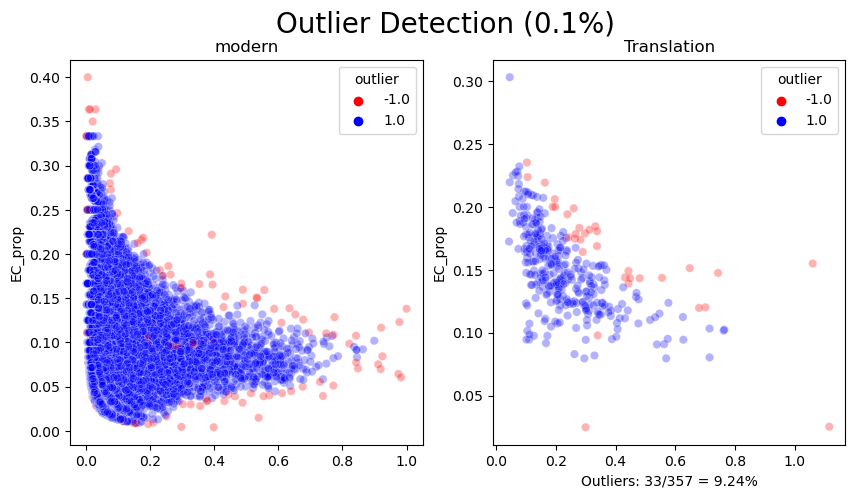

In [92]:
# 현대 소설 vs 번역

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)
axes = axes.flatten()

custom_palette1 = {-1: "red", 1: "blue"}
# custom_palette2 = {-1: "orange", 1: "blue"}
# custom_palette3 = {-1: "green", 1: "blue"}

sns.scatterplot(data=X_prop_df, x="len", y="EC_prop", ax=axes[0], hue="outlier", palette=custom_palette1, alpha=0.3)
axes[0].set_title("modern")
axes[0].set_xlabel("")
sns.scatterplot(data=X2_prop_df, x="len", y="EC_prop", ax=axes[1], hue="outlier", palette=custom_palette1, alpha=0.3)
axes[1].set_title("Translation")

num_outliers = sum(X2_prop_df['outlier'] == -1)
length = len(X2_prop_df)

axes[1].set_xlabel(f"Outliers: {num_outliers}/{length} = {num_outliers / length * 100:.2f}%")

# sns.scatterplot(data=X_prop_df, x="len", y="EC_prop", ax=axes[3], hue="outlier", palette=custom_palette1, alpha=0.3)
# sns.scatterplot(data=X1_prop_df, x="len", y="EC_prop", ax=axes[3], hue="outlier", palette=custom_palette1, alpha=0.3)
# sns.scatterplot(data=X2_prop_df, x="len", y="EC_prop", ax=axes[3], hue="outlier", palette=custom_palette1, alpha=0.3)
# axes[3].legend([])
# axes[3].set_xlabel("")
# axes[3].set_title("All")

plt.suptitle("Outlier Detection (0.1%)", fontsize=20)

Text(0.5, 0.98, 'Outlier Detection (0.1%)')

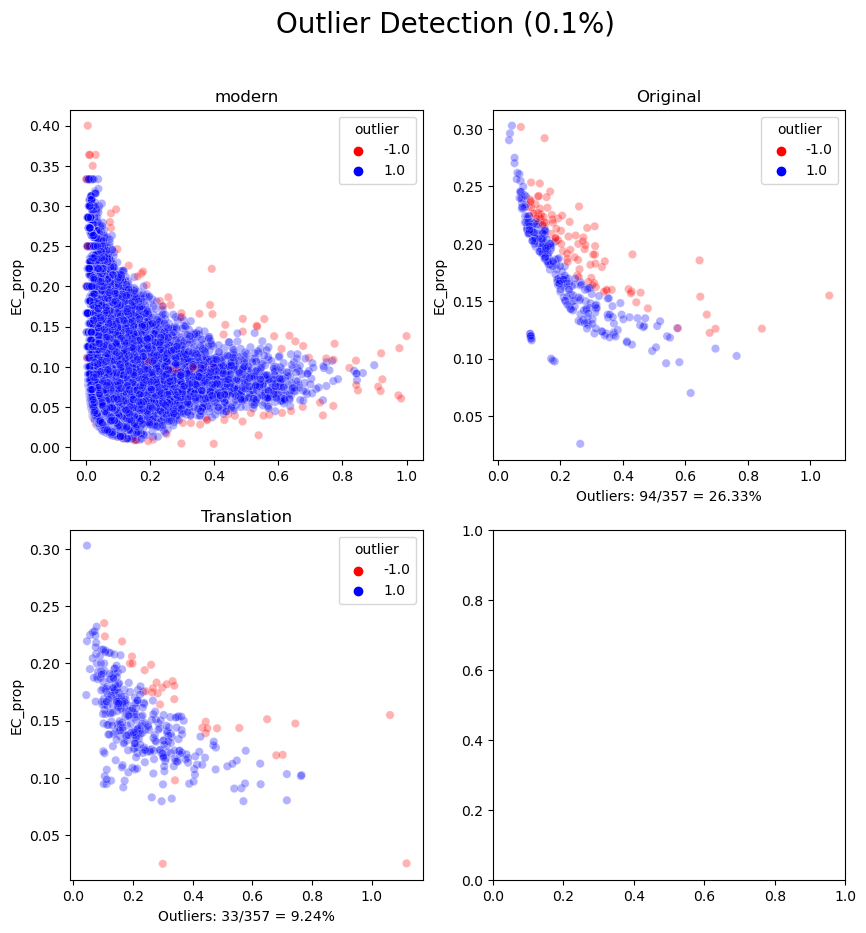

In [93]:
# 전부 다 그려본 결과

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10, 10), nrows=2, ncols=2)
axes = axes.flatten()

custom_palette1 = {-1: "red", 1: "blue"}
# custom_palette2 = {-1: "orange", 1: "blue"}
# custom_palette3 = {-1: "green", 1: "blue"}

sns.scatterplot(data=X_prop_df, x="len", y="EC_prop", ax=axes[0], hue="outlier", palette=custom_palette1, alpha=0.3)
axes[0].set_title("modern")
axes[0].set_xlabel("")
sns.scatterplot(data=X1_prop_df, x="len", y="EC_prop", ax=axes[1], hue="outlier", palette=custom_palette1, alpha=0.3)
axes[1].set_title("Original")
sns.scatterplot(data=X2_prop_df, x="len", y="EC_prop", ax=axes[2], hue="outlier", palette=custom_palette1, alpha=0.3)
axes[2].set_title("Translation")

num_outliers_ori = sum(X1_prop_df['outlier'] == -1)

num_outliers = sum(X2_prop_df['outlier'] == -1)
length = len(X2_prop_df)

axes[1].set_xlabel(f"Outliers: {num_outliers_ori}/{length} = {num_outliers_ori / length * 100:.2f}%")
axes[2].set_xlabel(f"Outliers: {num_outliers}/{length} = {num_outliers / length * 100:.2f}%")

# sns.scatterplot(data=X_prop_df, x="len", y="EC_prop", ax=axes[3], hue="outlier", palette=custom_palette1, alpha=0.3)
# sns.scatterplot(data=X1_prop_df, x="len", y="EC_prop", ax=axes[3], hue="outlier", palette=custom_palette1, alpha=0.3)
# sns.scatterplot(data=X2_prop_df, x="len", y="EC_prop", ax=axes[3], hue="outlier", palette=custom_palette1, alpha=0.3)
# axes[3].legend([])
# axes[3].set_xlabel("")
# axes[3].set_title("All")

plt.suptitle("Outlier Detection (0.1%)", fontsize=20)